# 1. Á≠âÂºèÁ∫¶Êùü‰ºòÂåñÈóÆÈ¢ò
ÈóÆÈ¢òÊèèËø∞
Ê±ÇËß£ $x^*$ ‰ΩøÁõÆÊ†áÂáΩÊï∞ $f(x)$ ÊúÄÂ∞èÂåñÔºå‰∏îÊª°Ë∂≥Á∫¶ÊùüÊù°‰ª∂ $c(x) = 0$ÔºåÂç≥Ôºö
$$
\min_{x} f(x), \quad \\ \text{s.t.} \quad c(x) = 0
$$




In [34]:
def f(x1, x2):
    return (x1-2)**2 + (x2-1)**2

def c(x1, x2):
    return x1 + x2 - 3



c:\Users\lvxiangyu11\anaconda3\envs\jax\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)


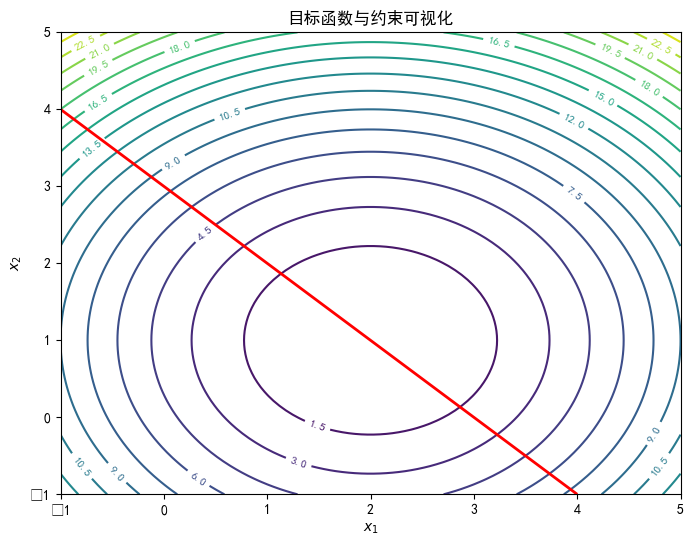

In [35]:
import numpy as np

import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei'] 

# ÂàõÂª∫ÁΩëÊ†º
x1 = np.linspace(-1, 5, 100)
x2 = np.linspace(-1, 5, 100)
X1, X2 = np.meshgrid(x1, x2)
Z = f(X1, X2)
C = c(X1, X2)

plt.figure(figsize=(8, 6))
# ÁªòÂà∂ÁõÆÊ†áÂáΩÊï∞Á≠âÈ´òÁ∫ø
contour = plt.contour(X1, X2, Z, levels=20, cmap='viridis')
plt.clabel(contour, inline=True, fontsize=8)
# ÁªòÂà∂Á∫¶ÊùüÁ∫ø
plt.contour(X1, X2, C, levels=[0], colors='red', linewidths=2)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('ÁõÆÊ†áÂáΩÊï∞‰∏éÁ∫¶ÊùüÂèØËßÜÂåñ')
plt.show()

ÊãâÊ†ºÊúóÊó•ÂáΩÊï∞Ë°®Á§∫‰∏∫Ôºö
$$
\mathcal{L}(x, \lambda) = f(x) + \lambda^T c(x)
$$
ÂÖ∂‰∏≠Ôºå$\lambda$ ‰∏∫ÊãâÊ†ºÊúóÊó•‰πòÂ≠ê„ÄÇÈÄöËøáÂØπ $\mathcal{L}(x, \lambda)$ ÂÖ≥‰∫é $x$ Âíå $\lambda$ Ê±ÇÂÅèÂØºÂπ∂‰ª§ÂÖ∂‰∏∫Èõ∂ÔºåÂèØ‰ª•ÂæóÂà∞ÂéüÈóÆÈ¢òÁöÑÊúÄ‰ºòËß£Êù°‰ª∂„ÄÇ

In [36]:
from jax import jacfwd
from jax import grad
from jax import hessian

def L(x1, x2, lambd):
    c = x1 + x2 - 3
    return f(x1, x2) + lambd * c

def gx_L(x1, x2, lambd):
    return (2 * (x1 - 2) + lambd), (2 * (x2 - 1) + lambd)

def glamba_L(x1, x2, lambd):
    return x1 + x2 - 3

def gx_L_jax(x1, x2, lambd):
    return grad(L, argnums=(0, 1))(x1, x2, lambd)

def glamba_L_jax(x1, x2, lambd):
    return grad(L, argnums=2)(x1, x2, lambd)

In [37]:
def H_L(x1, x2, lambd):
    return np.array([[2, 0],
                     [0, 2]])

def H_L_jax(x1, x2, lambd):
    return np.array(hessian(L, argnums=(0, 1))(x1, x2, lambd))


In [38]:
# Ëøë‰ºº H ÁöÑ ‚àá¬≤‚ÇìL(x, Œª) ÂÆûÁé∞
def nabla2_x_L(x1, x2, lambd):
    # ÂØπ‰∫éÊú¨‰æãÔºåÁõÆÊ†áÂáΩÊï∞ f(x) ÁöÑ Hessian ÊòØ [[2, 0], [0, 2]]ÔºåÁ∫¶Êùü c(x) ÂÖ≥‰∫é x ÁöÑ Hessian‰∏∫Èõ∂
    # Âõ†Ê≠§ ‚àá¬≤‚ÇìL(x, Œª) = ‚àá¬≤‚Çìf(x) + Œª‚àá¬≤‚Çìc(x) = [[2, 0], [0, 2]]
    return np.array([[2, 0],
                     [0, 2]])

# ‰ΩøÁî® jax Ëá™Âä®Ê±ÇÂØºÂÆûÁé∞ ‚àá¬≤‚ÇìL(x, Œª)
def nabla2_x_L_jax(x1, x2, lambd):
    # Âè™ÂØπ x1, x2 Ê±Ç HessianÔºålambd ‰∏çÂèÇ‰∏é
    return np.array(hessian(lambda x: L(x[0], x[1], lambd))(np.array([x1, x2])))

# ‰ΩøÁî® nabla2_x_L_jax(x1, x2, lambd) ‰πüÂèØËøë‰ºº H_L(x1, x2, lambd)

In [39]:
def newton_method(x1_init, x2_init, lambd_init, tol=1e-6, max_iter=100):
    x1, x2, lambd = x1_init, x2_init, lambd_init
    history = [(x1, x2, lambd)]
    
    for i in range(max_iter):
        # ËÆ°ÁÆóÊ¢ØÂ∫¶
        gx = gx_L_jax(x1, x2, lambd)
        glamba = glamba_L_jax(x1, x2, lambd)
        
        # ÊûÑÂª∫ÂÆåÊï¥ÁöÑÊ¢ØÂ∫¶ÂêëÈáè
        grad_vector = np.array([gx[0], gx[1], glamba])
        
        # ÊûÑÂª∫ÂÆåÊï¥ÁöÑHessianÁü©Èòµ (3x3)
        H_xx = H_L_jax(x1, x2, lambd)  # 2x2
        # Á∫¶ÊùüÂáΩÊï∞ÁöÑÊ¢ØÂ∫¶ [1, 1]
        grad_c = np.array([1, 1])
        
        # ÊûÑÂª∫KKTÁ≥ªÁªüÁü©Èòµ
        H_full = np.zeros((3, 3))
        H_full[:2, :2] = H_xx
        H_full[:2, 2] = grad_c
        H_full[2, :2] = grad_c
        
        # Ê±ÇËß£ÁâõÈ°øÊ≠•
        delta = np.linalg.solve(H_full, -grad_vector)
        
        x1 += delta[0]
        x2 += delta[1]
        lambd += delta[2]
        history.append((x1, x2, lambd))
        
        if np.linalg.norm(delta) < tol:
            break
            
    return history

def gauss_newton_method(x1_init, x2_init, lambd_init, tol=1e-6, max_iter=100):
    x1, x2, lambd = x1_init, x2_init, lambd_init
    history = [(x1, x2, lambd)]
    
    for i in range(max_iter):
        # ËÆ°ÁÆóÂÖ≥‰∫éxÁöÑÊ¢ØÂ∫¶
        gx = gx_L_jax(x1, x2, lambd)
        # ËÆ°ÁÆóÁ∫¶ÊùüÂÄº
        constraint_value = glamba_L_jax(x1, x2, lambd)
        
        # ‰ΩøÁî®Ëøë‰ººHessian (Âè™ÂåÖÂê´ÁõÆÊ†áÂáΩÊï∞ÁöÑ‰∫åÈò∂È°π)
        H_gauss = nabla2_x_L_jax(x1, x2, lambd)
        # Á∫¶ÊùüÂáΩÊï∞ÁöÑÊ¢ØÂ∫¶
        grad_c = np.array([1, 1])
        
        # ÊûÑÂª∫ÁÆÄÂåñÁöÑKKTÁ≥ªÁªü (3x3)
        H_full = np.zeros((3, 3))
        H_full[:2, :2] = H_gauss
        H_full[:2, 2] = grad_c
        H_full[2, :2] = grad_c
        
        # ÊûÑÂª∫Âè≥Á´ØÂêëÈáè
        rhs = np.array([-gx[0], -gx[1], -constraint_value])
        
        # Ê±ÇËß£È´òÊñØ-ÁâõÈ°øÊ≠•
        delta = np.linalg.solve(H_full, rhs)
        
        x1 += delta[0]
        x2 += delta[1]
        lambd += delta[2]
        history.append((x1, x2, lambd))
        
        if np.linalg.norm(delta) < tol:
            break
            
    return history


C:\Users\lvxiangyu11\AppData\Local\Temp\ipykernel_39940\1440664270.py:22: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X1, X2, C, levels=[0], colors='red', linewidths=2, label='Á∫¶Êùü: x1+x2=3')


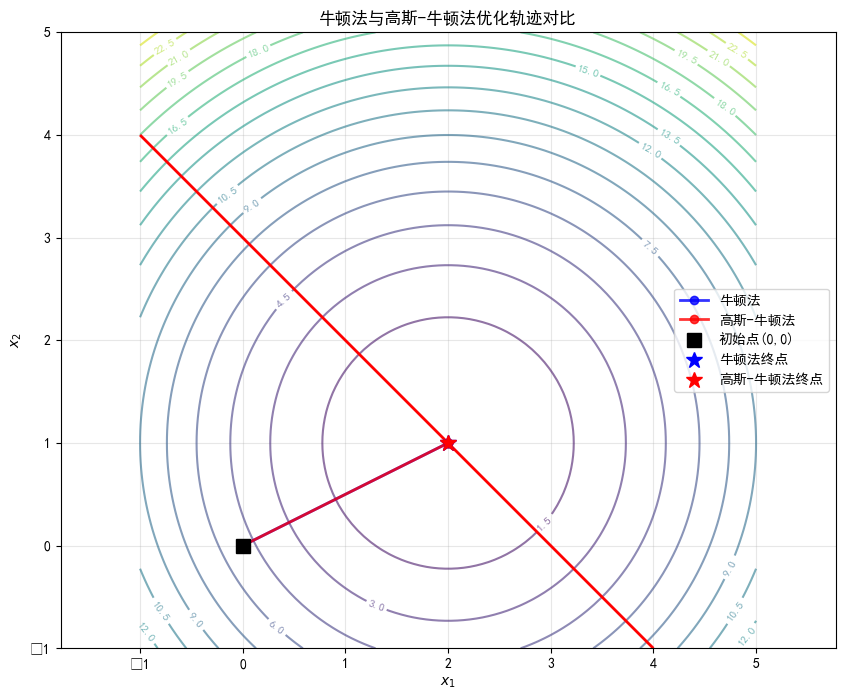

ÁâõÈ°øÊ≥ï:
Ëø≠‰ª£Ê¨°Êï∞: 2
ÊúÄÁªàËß£: x1=2.000000, x2=1.000000
ÁõÆÊ†áÂáΩÊï∞ÂÄº: 0.000000
Á∫¶ÊùüËøùÂèç: 0.000000e+00

È´òÊñØ-ÁâõÈ°øÊ≥ï:
Ëø≠‰ª£Ê¨°Êï∞: 2
ÊúÄÁªàËß£: x1=2.000000, x2=1.000000
ÁõÆÊ†áÂáΩÊï∞ÂÄº: 0.000000
Á∫¶ÊùüËøùÂèç: 0.000000e+00


In [40]:
# ËÆæÁΩÆÂàùÂßãÂÄº
x1_init, x2_init, lambd_init = 0.0, 0.0, 0.0

# ËøêË°å‰∏§ÁßçÊñπÊ≥ï
newton_history = newton_method(x1_init, x2_init, lambd_init)
gauss_newton_history = gauss_newton_method(x1_init, x2_init, lambd_init)

# ÊèêÂèñËΩ®ËøπÁÇπ
newton_x1 = [point[0] for point in newton_history]
newton_x2 = [point[1] for point in newton_history]
gauss_newton_x1 = [point[0] for point in gauss_newton_history]
gauss_newton_x2 = [point[1] for point in gauss_newton_history]

# ÂèØËßÜÂåñ
plt.figure(figsize=(10, 8))

# ÁªòÂà∂ÁõÆÊ†áÂáΩÊï∞Á≠âÈ´òÁ∫ø
contour = plt.contour(X1, X2, Z, levels=20, cmap='viridis', alpha=0.6)
plt.clabel(contour, inline=True, fontsize=8)

# ÁªòÂà∂Á∫¶ÊùüÁ∫ø
plt.contour(X1, X2, C, levels=[0], colors='red', linewidths=2, label='Á∫¶Êùü: x1+x2=3')

# ÁªòÂà∂ÁâõÈ°øÊ≥ïËΩ®Ëøπ
plt.plot(newton_x1, newton_x2, 'bo-', linewidth=2, markersize=6, label='ÁâõÈ°øÊ≥ï', alpha=0.8)

# ÁªòÂà∂È´òÊñØ-ÁâõÈ°øÊ≥ïËΩ®Ëøπ
plt.plot(gauss_newton_x1, gauss_newton_x2, 'ro-', linewidth=2, markersize=6, label='È´òÊñØ-ÁâõÈ°øÊ≥ï', alpha=0.8)

# Ê†áËÆ∞Ëµ∑ÂßãÁÇπ
plt.plot(x1_init, x2_init, 'ks', markersize=10, label='ÂàùÂßãÁÇπ(0,0)')

# Ê†áËÆ∞ÊúÄÁªàÁÇπ
plt.plot(newton_x1[-1], newton_x2[-1], 'b*', markersize=12, label='ÁâõÈ°øÊ≥ïÁªàÁÇπ')
plt.plot(gauss_newton_x1[-1], gauss_newton_x2[-1], 'r*', markersize=12, label='È´òÊñØ-ÁâõÈ°øÊ≥ïÁªàÁÇπ')

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('ÁâõÈ°øÊ≥ï‰∏éÈ´òÊñØ-ÁâõÈ°øÊ≥ï‰ºòÂåñËΩ®ËøπÂØπÊØî')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.show()

# ÊâìÂç∞Êî∂ÊïõÁªìÊûú
print("ÁâõÈ°øÊ≥ï:")
print(f"Ëø≠‰ª£Ê¨°Êï∞: {len(newton_history)-1}")
print(f"ÊúÄÁªàËß£: x1={newton_x1[-1]:.6f}, x2={newton_x2[-1]:.6f}")
print(f"ÁõÆÊ†áÂáΩÊï∞ÂÄº: {f(newton_x1[-1], newton_x2[-1]):.6f}")
print(f"Á∫¶ÊùüËøùÂèç: {c(newton_x1[-1], newton_x2[-1]):.6e}")

print("\nÈ´òÊñØ-ÁâõÈ°øÊ≥ï:")
print(f"Ëø≠‰ª£Ê¨°Êï∞: {len(gauss_newton_history)-1}")
print(f"ÊúÄÁªàËß£: x1={gauss_newton_x1[-1]:.6f}, x2={gauss_newton_x2[-1]:.6f}")
print(f"ÁõÆÊ†áÂáΩÊï∞ÂÄº: {f(gauss_newton_x1[-1], gauss_newton_x2[-1]):.6f}")
print(f"Á∫¶ÊùüËøùÂèç: {c(gauss_newton_x1[-1], gauss_newton_x2[-1]):.6e}")

# 2 ‰∏çÁ≠âÂºèÁ∫¶Êùü‰ºòÂåñ

Êú¨ËäÇÂ∞ÜÂ±ïÁ§∫‰∏Ä‰∏™‰∏çÁ≠âÂºèÁ∫¶Êùü‰ºòÂåñÈóÆÈ¢òÁöÑÁ§∫‰æã„ÄÇÁõÆÊ†áÂáΩÊï∞ $f(x)$ ‰ªçÊ≤øÁî®ÂâçËø∞ÂÆö‰πâÔºåÈóÆÈ¢òÂΩ¢Âºè‰∏∫Ôºö

$$
\min f(x), \\ \quad \text{s.t.} \quad g_1(x) = x_1 + x_2 - 3 \geq 0,\\ \quad g_2(x) = x_1 \geq 0
$$

Âç≥Âú®Êª°Ë∂≥ $x_1 + x_2 \geq 3$ ‰∏î $x_1 \geq 0$ ÁöÑÊù°‰ª∂‰∏ãÔºåÊúÄÂ∞èÂåñ $f(x)$„ÄÇ


C:\Users\lvxiangyu11\AppData\Local\Temp\ipykernel_39940\3066119606.py:14: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X1, X2, g1(X1, X2), levels=[0], colors='red', linewidths=2, label='g1(x)=0')
C:\Users\lvxiangyu11\AppData\Local\Temp\ipykernel_39940\3066119606.py:16: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X1, X2, g2(X1, X2), levels=[0], colors='blue', linewidths=2, label='g2(x)=0')


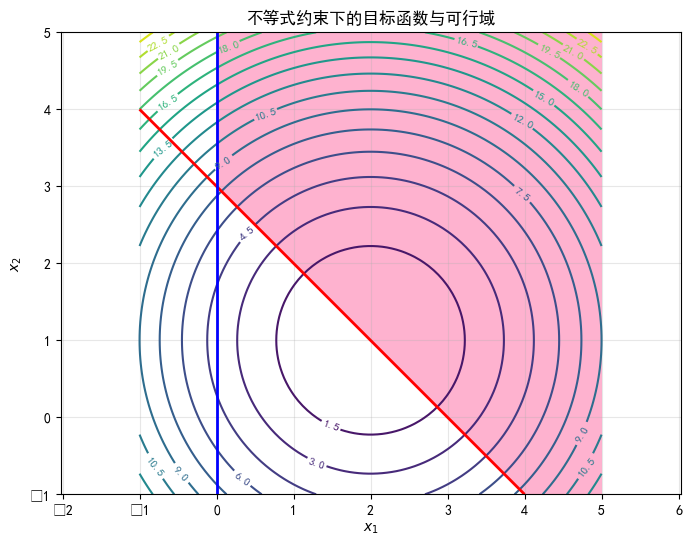

In [41]:
# ÂÆö‰πâ‰∏çÁ≠âÂºèÁ∫¶ÊùüÂáΩÊï∞
def g1(x1, x2):
    return x1 + x2 - 3  # g1(x) >= 0

def g2(x1, x2):
    return x1  # g2(x) >= 0

# ÂèØËßÜÂåñÁõÆÊ†áÂáΩÊï∞Âíå‰∏çÁ≠âÂºèÁ∫¶ÊùüÂå∫Âüü
plt.figure(figsize=(8, 6))
contour = plt.contour(X1, X2, Z, levels=20, cmap='viridis')
plt.clabel(contour, inline=True, fontsize=8)

# ÁªòÂà∂ g1(x) = 0 ËæπÁïåÁ∫ø
plt.contour(X1, X2, g1(X1, X2), levels=[0], colors='red', linewidths=2, label='g1(x)=0')
# ÁªòÂà∂ g2(x) = 0 ËæπÁïåÁ∫ø
plt.contour(X1, X2, g2(X1, X2), levels=[0], colors='blue', linewidths=2, label='g2(x)=0')

# Â°´ÂÖÖÂèØË°åÂüü
feasible = np.logical_and(g1(X1, X2) >= 0, g2(X1, X2) >= 0)
plt.contourf(X1, X2, feasible, levels=[0.5, 1], colors=["#fe0062"], alpha=0.3)

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('‰∏çÁ≠âÂºèÁ∫¶Êùü‰∏ãÁöÑÁõÆÊ†áÂáΩÊï∞‰∏éÂèØË°åÂüü')
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.show()

## 2.1 Active-Set Method

In [42]:
def active_set_method(x0, tol=1e-6, max_iter=100):
    """
    Active-Set Method for inequality constrained optimization
    
    Minimize: f(x) = (x1-2)^2 + (x2-1)^2
    Subject to: g1(x) = x1 + x2 - 3 >= 0
                g2(x) = x1 >= 0
    
    Args:
        x0: Initial point [x1, x2]
        tol: Tolerance for convergence
        max_iter: Maximum iterations
    
    Returns:
        history: List of (x, active_set, lambda) tuples
    """
    x = np.array(x0, dtype=float)
    history = []
    
    # Á°Æ‰øùÂàùÂßãÁÇπÂèØË°å
    g_vals = np.array([g1(x[0], x[1]), g2(x[0], x[1])])
    if np.any(g_vals < 0):
        # Â∞ÜÁÇπÊäïÂΩ±Âà∞ÂèØË°åÂüü
        if g2(x[0], x[1]) < 0:  # x1 < 0
            x[0] = 0.1
        if g1(x[0], x[1]) < 0:  # x1 + x2 - 3 < 0
            x[1] = 3.1 - x[0]
    
    # Define constraint functions and their gradients
    def constraints(x):
        return np.array([g1(x[0], x[1]), g2(x[0], x[1])])
    
    def constraint_gradients(x):
        # g1: x1 + x2 - 3, gradient = [1, 1]
        # g2: x1, gradient = [1, 0]
        return np.array([[1, 1], [1, 0]])
    
    def objective_gradient(x):
        return np.array([2*(x[0]-2), 2*(x[1]-1)])
    
    def objective_hessian(x):
        return np.array([[2, 0], [0, 2]])
    
    for k in range(max_iter):
        # Step 1: ËØÜÂà´Ê¥ªÂä®Á∫¶Êùü
        g_vals = constraints(x)
        # ÂØπ‰∫é‰∏çÁ≠âÂºèÁ∫¶Êùü g(x) >= 0ÔºåÊ¥ªÂä®Á∫¶ÊùüÊòØ g(x) ‚âà 0
        active_set = np.where(g_vals <= tol)[0]
        
        print(f"Ëø≠‰ª£ {k}: x = [{x[0]:.4f}, {x[1]:.4f}], g_vals = [{g_vals[0]:.4f}, {g_vals[1]:.4f}], active_set = {active_set}")
        
        if len(active_set) == 0:
            # Ê≤°ÊúâÊ¥ªÂä®Á∫¶ÊùüÔºåÁõ¥Êé•ÊúÄÂ∞èÂåñÁõÆÊ†áÂáΩÊï∞
            grad_f = objective_gradient(x)
            H = objective_hessian(x)
            delta_x = -np.linalg.solve(H, grad_f)
            lambda_active = np.array([])
        else:
            # ÊúâÊ¥ªÂä®Á∫¶ÊùüÔºåÊ±ÇËß£KKTÁ≥ªÁªü
            grad_f = objective_gradient(x)
            H = objective_hessian(x)
            C = constraint_gradients(x)[active_set]  # Ê¥ªÂä®Á∫¶ÊùüÁöÑÊ¢ØÂ∫¶Áü©Èòµ
            
            # ÊûÑÂª∫KKTÁ≥ªÁªü: [H  C^T] [delta_x] = [-grad_f]
            #              [C   0 ] [delta_Œª]   [-c_vals[active_set]]
            n = len(x)
            m = len(active_set)
            
            KKT_matrix = np.zeros((n + m, n + m))
            KKT_matrix[:n, :n] = H
            KKT_matrix[:n, n:] = C.T
            KKT_matrix[n:, :n] = C
            
            rhs = np.zeros(n + m)
            rhs[:n] = -grad_f
            rhs[n:] = -g_vals[active_set]
            # Ê≥®ÊÑèÔºöÂØπ‰∫éÊ¥ªÂä®Á∫¶ÊùüÔºåÂè≥Á´ØÈ°πÂ∫îËØ•ÊòØ0ÔºåÂõ†‰∏∫Êàë‰ª¨Ë¶Å‰øùÊåÅÂú®Á∫¶ÊùüËæπÁïå‰∏ä
            
            solution = np.linalg.solve(KKT_matrix, rhs)
            delta_x = solution[:n]
            lambda_active = solution[n:]
        
        # Step 2: Ê£ÄÊü•KKTÊù°‰ª∂
        lambda_full = np.zeros(2)
        if len(active_set) > 0:
            lambda_full[active_set] = lambda_active
        
        # Â¶ÇÊûúÊâÄÊúâKKTÊù°‰ª∂Êª°Ë∂≥‰∏îËææÂà∞ÊúÄ‰ºòÊÄß
        if len(active_set) > 0 \
                and np.all(lambda_full[active_set] >= -tol) \
                and np.linalg.norm(delta_x) < tol:
            history.append((x.copy(), active_set.copy(), lambda_full.copy()))
            print(f"Êî∂Êïõ: KKTÊù°‰ª∂Êª°Ë∂≥")
            break
        
        # Step 3: Â¶ÇÊûúËøùÂèçKKTÊù°‰ª∂ÔºàÊúâË¥üÁöÑÊãâÊ†ºÊúóÊó•‰πòÂ≠êÔºâÔºåÁßªÈô§ÂØπÂ∫îÁ∫¶Êùü
        if len(active_set) > 0 and np.any(lambda_full[active_set] < -tol):
            # ÊâæÂà∞ÊúÄË¥üÁöÑÊãâÊ†ºÊúóÊó•‰πòÂ≠êÂØπÂ∫îÁöÑÁ∫¶Êùü
            negative_mask = lambda_full[active_set] < -tol
            negative_indices = active_set[negative_mask]
            worst_idx = negative_indices[np.argmin(lambda_full[negative_indices])]
            print(f"ÁßªÈô§Á∫¶Êùü {worst_idx}ÔºåÊãâÊ†ºÊúóÊó•‰πòÂ≠ê = {lambda_full[worst_idx]:.4f}")
            # ‰ªéÊ¥ªÂä®ÈõÜ‰∏≠ÁßªÈô§Ëøô‰∏™Á∫¶Êùü
            active_set = active_set[active_set != worst_idx]
            history.append((x.copy(), active_set.copy(), lambda_full.copy()))
            continue
        
        # Step 4: Á∫øÊêúÁ¥¢Á°ÆÂÆöÊ≠•Èïø
        alpha = 1.0
        
        # ÊéßÂà∂Ê≠•ÈïøÔºåÁ°Æ‰øù‰∏çËøùÂèç‰∏çÁ≠âÂºèÁ∫¶Êùü
        for i in range(len(g_vals)):
            if i not in active_set:  # ÈùûÊ¥ªÂä®Á∫¶Êùü
                grad_gi = constraint_gradients(x)[i]
                denominator = np.dot(grad_gi, delta_x)
                if denominator < 0:  # p ÊåáÂêëËøùÂèçÁ∫¶ÊùüÁöÑÊñπÂêë
                    alpha_i = g_vals[i] / (-denominator)
                    if alpha_i < alpha:
                        alpha = alpha_i
                        print(f"Ê≠•ÈïøÂèóÁ∫¶Êùü {i} ÈôêÂà∂: alpha = {alpha:.4f}")
        
        # Êõ¥Êñ∞Ëß£
        x_new = x + alpha * delta_x
        
        # Step 5: Ê£ÄÊü•Êñ∞ÁÇπÊòØÂê¶ÊøÄÊ¥ªÊñ∞ÁöÑÁ∫¶Êùü
        g_new = constraints(x_new)
        new_active = []
        for i in range(len(g_new)):
            if i not in active_set and g_new[i] <= tol:
                new_active.append(i)
                print(f"ÊøÄÊ¥ªÊñ∞Á∫¶Êùü {i}")
        
        if new_active:
            active_set = np.concatenate([active_set, new_active])
        
        history.append((x.copy(), active_set.copy(), lambda_full.copy()))
        x = x_new
        
        # Êî∂ÊïõÊ£ÄÊü•
        if np.linalg.norm(delta_x) < tol and len(active_set) == 0:
            print(f"Êî∂Êïõ: Êó†Á∫¶ÊùüÊúÄ‰ºòËß£")
            break
    
    return history

# ÊµãËØïActive-SetÊñπÊ≥ï
x0 = [1.0, 2.1]  # ‰ΩøÁî®ÂèØË°åÁöÑÂàùÂßãÁÇπ
as_history = active_set_method(x0)

print("\nActive-Set Method ÁªìÊûú:")
print(f"Ëø≠‰ª£Ê¨°Êï∞: {len(as_history)}")
if len(as_history) > 0:
    final_x, final_active, final_lambda = as_history[-1]
    print(f"ÊúÄÁªàËß£: x1={final_x[0]:.6f}, x2={final_x[1]:.6f}")
    print(f"ÁõÆÊ†áÂáΩÊï∞ÂÄº: {f(final_x[0], final_x[1]):.6f}")
    print(f"Á∫¶ÊùüÂÄº: g1={g1(final_x[0], final_x[1]):.6f}, g2={g2(final_x[0], final_x[1]):.6f}")
    print(f"Ê¥ªÂä®Á∫¶Êùü: {final_active}")
    print(f"ÊãâÊ†ºÊúóÊó•‰πòÂ≠ê: {final_lambda}")
    
    # È™åËØÅÂèØË°åÊÄß
    g_vals = np.array([g1(final_x[0], final_x[1]), g2(final_x[0], final_x[1])])
    feasible = np.all(g_vals >= -1e-6)
    print(f"Ëß£ÊòØÂê¶ÂèØË°å: {feasible}")

Ëø≠‰ª£ 0: x = [1.0000, 2.1000], g_vals = [0.1000, 1.0000], active_set = []
ÊøÄÊ¥ªÊñ∞Á∫¶Êùü 0
Ëø≠‰ª£ 1: x = [2.0000, 1.0000], g_vals = [0.0000, 2.0000], active_set = [0]
Êî∂Êïõ: KKTÊù°‰ª∂Êª°Ë∂≥

Active-Set Method ÁªìÊûú:
Ëø≠‰ª£Ê¨°Êï∞: 2
ÊúÄÁªàËß£: x1=2.000000, x2=1.000000
ÁõÆÊ†áÂáΩÊï∞ÂÄº: 0.000000
Á∫¶ÊùüÂÄº: g1=0.000000, g2=2.000000
Ê¥ªÂä®Á∫¶Êùü: [0]
ÊãâÊ†ºÊúóÊó•‰πòÂ≠ê: [-0.  0.]
Ëß£ÊòØÂê¶ÂèØË°å: True


# 2.2 Barrier / Interior-Point Method

In [43]:
def barrier_method(x0, mu_init=1.0, tau=0.1, tol=1e-6, max_iter=100):
    """
    Barrier/Interior-Point Method for inequality constrained optimization
    
    Minimize: f(x) - mu * sum(log(g_i(x))) where g_i(x) >= 0
    
    Args:
        x0: Initial feasible point [x1, x2]
        mu_init: Initial barrier parameter
        tau: Barrier parameter reduction factor (0 < tau < 1)
        tol: Tolerance for convergence
        max_iter: Maximum iterations
    
    Returns:
        history: List of (x, mu) tuples
    """
    def barrier_objective(x, mu):
        """Barrier function: f(x) - mu * sum(log(g_i(x)))"""
        g_vals = np.array([g1(x[0], x[1]), g2(x[0], x[1])])
        if np.any(g_vals <= 0):
            return np.inf
        return f(x[0], x[1]) - mu * np.sum(np.log(g_vals))
    
    def barrier_gradient(x, mu):
        """Gradient of barrier function"""
        g_vals = np.array([g1(x[0], x[1]), g2(x[0], x[1])])
        if np.any(g_vals <= 1e-10):
            return np.array([np.inf, np.inf])
        
        # ÁõÆÊ†áÂáΩÊï∞Ê¢ØÂ∫¶
        grad_f = np.array([2*(x[0]-2), 2*(x[1]-1)])
        
        # Á∫¶ÊùüÂáΩÊï∞Ê¢ØÂ∫¶
        grad_g1 = np.array([1, 1])  # gradient of g1 = x1 + x2 - 3
        grad_g2 = np.array([1, 0])  # gradient of g2 = x1
        
        # BarrierÈ°πÊ¢ØÂ∫¶: -mu * sum(grad_g_i / g_i)
        barrier_grad = -mu * (grad_g1/g_vals[0] + grad_g2/g_vals[1])
        
        return grad_f + barrier_grad
    
    def barrier_hessian(x, mu):
        """Hessian of barrier function"""
        g_vals = np.array([g1(x[0], x[1]), g2(x[0], x[1])])
        if np.any(g_vals <= 1e-10):
            return np.array([[np.inf, np.inf], [np.inf, np.inf]])
        
        # ÁõÆÊ†áÂáΩÊï∞Hessian
        H_f = np.array([[2, 0], [0, 2]])
        
        # BarrierÈ°πHessian: mu * sum(grad_g_i * grad_g_i^T / g_i^2)
        grad_g1 = np.array([1, 1])
        grad_g2 = np.array([1, 0])
        
        H_barrier = mu * (np.outer(grad_g1, grad_g1)/g_vals[0]**2 + 
                         np.outer(grad_g2, grad_g2)/g_vals[1]**2)
        
        return H_f + H_barrier
    
    def barrier_hessian_jax(x, mu):
        """Hessian of barrier function using JAX automatic differentiation"""
        from jax import hessian
        import jax.numpy as jnp
        
        def barrier_obj_jax(x_vec):
            """JAXÁâàÊú¨ÁöÑbarrierÁõÆÊ†áÂáΩÊï∞"""
            x1, x2 = x_vec[0], x_vec[1]
            
            # Á∫¶ÊùüÂáΩÊï∞ÂÄº
            g1_val = x1 + x2 - 3
            g2_val = x1
            
            # Ê£ÄÊü•ÂèØË°åÊÄß
            if g1_val <= 0 or g2_val <= 0:
                return jnp.inf
            
            # ÁõÆÊ†áÂáΩÊï∞
            f_val = (x1 - 2)**2 + (x2 - 1)**2
            
            # BarrierÈ°π
            barrier_term = -mu * (jnp.log(g1_val) + jnp.log(g2_val))
            
            return f_val + barrier_term
        
        # ‰ΩøÁî®JAXËÆ°ÁÆóHessian
        x_vec = np.array([x[0], x[1]])
        H_jax = hessian(barrier_obj_jax)(x_vec)
        
        return np.array(H_jax)
        
    # Á°Æ‰øùÂàùÂßãÁÇπÊòØÂèØË°åÁöÑ
    x = np.array(x0, dtype=float)
    g_vals = np.array([g1(x[0], x[1]), g2(x[0], x[1])])
    if np.any(g_vals <= 0):
        # Ë∞ÉÊï¥Âà∞ÂèØË°åÂüüÂÜÖÈÉ®
        x[0] = max(x[0], 0.1)
        x[1] = max(3.1 - x[0], 0.1)
    
    mu = mu_init
    history = []
    
    for outer_iter in range(max_iter):
        # ÂÜÖÂ±ÇÂæ™ÁéØÔºöÁî®ÁâõÈ°øÊ≥ïÊúÄÂ∞èÂåñbarrierÂáΩÊï∞
        for inner_iter in range(50):
            grad = barrier_gradient(x, mu)
            # H = barrier_hessian(x, mu)
            H = barrier_hessian_jax(x, mu)
            
            if np.any(np.isinf(grad)) or np.any(np.isinf(H)):
                break
            
            # ÁâõÈ°øÊ≠•
            try:
                p = -np.linalg.solve(H, grad)
            except np.linalg.LinAlgError:
                # Â¶ÇÊûúHessian‰∏çÂèØÈÄÜÔºå‰ΩøÁî®Ê≠£ÂàôÂåñÊñπÊ≥ï
                # ÁâõÈ°øÊ≠•ÔºåTikhonovÊ≠£ÂàôÂåñÔºåÁ°Æ‰øùHessianÊ≠£ÂÆö
                reg = 1e-8
                max_reg = 1e6
                success = False
                while reg < max_reg:
                    try:
                        H_reg = H + reg * np.eye(H.shape[0])
                        # Ê£ÄÊü•Ê≠£ÂÆöÊÄß
                        np.linalg.cholesky(H_reg)
                        p = -np.linalg.solve(H_reg, grad)
                        success = True
                        break
                    except np.linalg.LinAlgError:
                        reg *= 10
                if not success:
                    p = -0.01 * grad
            
            # ÂõûÊ∫ØÁ∫øÊêúÁ¥¢
            alpha = 1.0
            while alpha > 1e-8:
                x_new = x + alpha * p
                g_new = np.array([g1(x_new[0], x_new[1]), g2(x_new[0], x_new[1])])
                
                if np.all(g_new > 0):  # ‰øùÊåÅÂèØË°åÊÄß
                    obj_new = barrier_objective(x_new, mu)
                    obj_current = barrier_objective(x, mu)
                    
                    if obj_new < obj_current:
                        x = x_new
                        break
                
                alpha *= 0.5
            
            # ÂÜÖÂ±ÇÊî∂ÊïõÊ£ÄÊü•
            if np.linalg.norm(grad) < tol:
                break
        
        history.append((x.copy(), mu))
        
        # Â§ñÂ±ÇÊî∂ÊïõÊ£ÄÊü•
        if mu < tol:
            break
        
        # ÂáèÂ∞èbarrierÂèÇÊï∞
        mu *= tau

        print(f"Â§ñÂ±ÇËø≠‰ª£ {outer_iter}: x = [{x[0]:.6f}, {x[1]:.6f}], mu = {mu:.2e}, f(x) = {f(x[0], x[1]):.6f}, g1 = {g1(x[0], x[1]):.6f}, g2 = {g2(x[0], x[1]):.6f}")
    
    return history

# ÊµãËØïBarrierÊñπÊ≥ï
x0 = [1.0, 2.1]  # ÂèØË°åÁöÑÂàùÂßãÁÇπ
barrier_history = barrier_method(x0)

print("Barrier Method ÁªìÊûú:")
print(f"Ëø≠‰ª£Ê¨°Êï∞: {len(barrier_history)}")
if len(barrier_history) > 0:
    final_x, final_mu = barrier_history[-1]
    print(f"ÊúÄÁªàËß£: x1={final_x[0]:.6f}, x2={final_x[1]:.6f}")
    print(f"ÁõÆÊ†áÂáΩÊï∞ÂÄº: {f(final_x[0], final_x[1]):.6f}")
    print(f"Á∫¶ÊùüÂÄº: g1={g1(final_x[0], final_x[1]):.6f}, g2={g2(final_x[0], final_x[1]):.6f}")
    print(f"ÊúÄÁªàbarrierÂèÇÊï∞: {final_mu:.6e}")

Â§ñÂ±ÇËø≠‰ª£ 0: x = [2.644058, 1.454954], mu = 1.00e-01, f(x) = 0.621793, g1 = 1.099012, g2 = 2.644058
Â§ñÂ±ÇËø≠‰ª£ 1: x = [2.175456, 1.152472], mu = 1.00e-02, f(x) = 0.054033, g1 = 0.327928, g2 = 2.175456
Â§ñÂ±ÇËø≠‰ª£ 2: x = [2.051831, 1.049394], mu = 1.00e-03, f(x) = 0.005126, g1 = 0.101226, g2 = 2.051831
Â§ñÂ±ÇËø≠‰ª£ 3: x = [2.015998, 1.015750], mu = 1.00e-04, f(x) = 0.000504, g1 = 0.031747, g2 = 2.015998
Â§ñÂ±ÇËø≠‰ª£ 4: x = [2.005019, 1.004994], mu = 1.00e-05, f(x) = 0.000050, g1 = 0.010012, g2 = 2.005019
Â§ñÂ±ÇËø≠‰ª£ 5: x = [2.001583, 1.001581], mu = 1.00e-06, f(x) = 0.000005, g1 = 0.003164, g2 = 2.001583
Â§ñÂ±ÇËø≠‰ª£ 6: x = [2.000500, 1.000500], mu = 1.00e-07, f(x) = 0.000001, g1 = 0.001000, g2 = 2.000500
Barrier Method ÁªìÊûú:
Ëø≠‰ª£Ê¨°Êï∞: 8
ÊúÄÁªàËß£: x1=2.000158, x2=1.000158
ÁõÆÊ†áÂáΩÊï∞ÂÄº: 0.000000
Á∫¶ÊùüÂÄº: g1=0.000316, g2=2.000158
ÊúÄÁªàbarrierÂèÇÊï∞: 1.000000e-07


# 2.3 Penality / Exterior-Point Method

In [44]:
def penalty_method_v2(x0, rho_init=1.0, gamma=10.0, tol=1e-6, max_iter=100):
    """
    Â¢ûÂº∫È≤ÅÊ£íÊÄßÁöÑ Penalty/Exterior-Point Method
    
    ‰∏ªË¶ÅÊîπËøõÔºö
    1. ‰∏§Èò∂ÊÆµÁ≠ñÁï•ÔºöÂÖàÁî®Á∫¶ÊùüÂºïÂØºÂà∞ÂèØË°åÂüüÈôÑËøëÔºåÂÜçÁ≤æÁ°Æ‰ºòÂåñ
    2. Âä®ÊÄÅÊùÉÈáçÔºöÊ†πÊçÆÁ∫¶ÊùüËøùÂèçÁ®ãÂ∫¶Âä®ÊÄÅË∞ÉÊï¥ÁõÆÊ†áÂáΩÊï∞ÂíåÊÉ©ÁΩöÈ°πÁöÑÊùÉÈáç
    3. Êô∫ËÉΩÈáçÂêØÔºöÂΩìÈô∑ÂÖ•Â±ÄÈÉ®Êó∂Ëá™Âä®ÈáçÂêØ
    4. Â§öÁ≠ñÁï•ËûçÂêàÔºöÁªìÂêàÊ¢ØÂ∫¶‰∏ãÈôç„ÄÅÁâõÈ°øÊ≥ïÂíåÁ∫¶ÊùüÊäïÂΩ±
    """
    
    def penalty_objective(x, rho, alpha=1.0):
        """Âä†ÊùÉÊÉ©ÁΩöÂáΩÊï∞"""
        f_val = f(x[0], x[1])
        g_vals = np.array([g1(x[0], x[1]), g2(x[0], x[1])])
        penalty_term = rho * np.sum(np.maximum(0, -g_vals)**2)
        return alpha * f_val + penalty_term
    
    def constraint_violation_gradient(x):
        """Á∫¶ÊùüËøùÂèçÁöÑÊ¢ØÂ∫¶Ôºà‰ªÖËÄÉËôëËøùÂèçÁöÑÁ∫¶ÊùüÔºâ"""
        g_vals = np.array([g1(x[0], x[1]), g2(x[0], x[1])])
        grad_g1 = np.array([1, 1])
        grad_g2 = np.array([1, 0])
        
        total_grad = np.zeros(2)
        if g_vals[0] < 0:  # ËøùÂèçÁ∫¶Êùü g1
            total_grad += -2 * g_vals[0] * grad_g1
        if g_vals[1] < 0:  # ËøùÂèçÁ∫¶Êùü g2
            total_grad += -2 * g_vals[1] * grad_g2
        
        return total_grad
    
    def project_to_feasible_direction(x):
        """ËÆ°ÁÆóÊåáÂêëÂèØË°åÂüüÁöÑÊñπÂêë"""
        g_vals = np.array([g1(x[0], x[1]), g2(x[0], x[1])])
        direction = np.zeros(2)
        
        # Â¶ÇÊûúËøùÂèç g1: x1 + x2 - 3 >= 0
        if g_vals[0] < 0:
            direction += np.array([0.5, 0.5])  # Â¢ûÂä† x1 Âíå x2
        
        # Â¶ÇÊûúËøùÂèç g2: x1 >= 0
        if g_vals[1] < 0:
            direction += np.array([1.0, 0.0])  # Â¢ûÂä† x1
        
        if np.linalg.norm(direction) > 0:
            direction = direction / np.linalg.norm(direction)
        
        return direction
    
    def adaptive_step_size(x, direction, max_step=1.0):
        """Ëá™ÈÄÇÂ∫îÊ≠•ÈïøÔºåÁ°Æ‰øùÊúùÁùÄÂáèÂ∞ëÁ∫¶ÊùüËøùÂèçÁöÑÊñπÂêëÁßªÂä®"""
        best_alpha = 0.0
        best_violation = np.sum(np.maximum(0, -np.array([g1(x[0], x[1]), g2(x[0], x[1])])))**2
        
        alphas = [max_step, max_step/2, max_step/4, max_step/10, max_step/100]
        
        for alpha in alphas:
            x_new = x + alpha * direction
            g_new = np.array([g1(x_new[0], x_new[1]), g2(x_new[0], x_new[1])])
            violation_new = np.sum(np.maximum(0, -g_new)**2)
            
            if violation_new < best_violation:
                best_alpha = alpha
                best_violation = violation_new
        
        return best_alpha
    
    # ÂàùÂßãÂåñ
    x = np.array(x0, dtype=float)
    rho = rho_init
    history = []
    
    # ËÆ°ÁÆóÂàùÂßãÁ∫¶ÊùüËøùÂèç
    g_vals_init = np.array([g1(x[0], x[1]), g2(x[0], x[1])])
    constraint_violation_init = np.sum(np.maximum(0, -g_vals_init)**2)
    
    print(f"Â¢ûÂº∫È≤ÅÊ£íÊÄßÁöÑÊÉ©ÁΩöÂáΩÊï∞Ê≥ïÂºÄÂßã... ÂàùÂßãÁ∫¶ÊùüËøùÂèç: {constraint_violation_init:.3f}")
    
    # Á¨¨‰∏ÄÈò∂ÊÆµÔºöÁ∫¶ÊùüÂºïÂØºÈò∂ÊÆµÔºàÂ¶ÇÊûúÂàùÂßãÁÇπ‰∏•ÈáçËøùÂèçÁ∫¶ÊùüÔºâ
    if constraint_violation_init > 1.0:
        print("Á¨¨‰∏ÄÈò∂ÊÆµÔºöÁ∫¶ÊùüÂºïÂØºÈò∂ÊÆµ")
        
        for phase1_iter in range(20):
            g_vals = np.array([g1(x[0], x[1]), g2(x[0], x[1])])
            constraint_violation = np.sum(np.maximum(0, -g_vals)**2)
            
            if constraint_violation < 0.1:
                print(f"  Á¨¨‰∏ÄÈò∂ÊÆµÂÆåÊàêÔºåÁ∫¶ÊùüËøùÂèçÈôçËá≥ {constraint_violation:.6f}")
                break
            
            # ‰ΩøÁî®Á∫¶ÊùüÂºïÂØºÊñπÂêë
            feasible_direction = project_to_feasible_direction(x)
            
            if np.linalg.norm(feasible_direction) > 0:
                step_size = adaptive_step_size(x, feasible_direction, max_step=2.0)
                if step_size > 0:
                    x = x + step_size * feasible_direction
                    print(f"  ÂºïÂØºÊ≠• {phase1_iter}: x = [{x[0]:.3f}, {x[1]:.3f}], ËøùÂèç = {constraint_violation:.3f}")
            
            # Â¶ÇÊûúÂºïÂØºÊñπÂêëÊó†ÊïàÔºå‰ΩøÁî®Á∫¶ÊùüËøùÂèçÊ¢ØÂ∫¶
            if np.linalg.norm(feasible_direction) == 0 or step_size == 0:
                cv_grad = constraint_violation_gradient(x)
                if np.linalg.norm(cv_grad) > 0:
                    step_size = adaptive_step_size(x, cv_grad / np.linalg.norm(cv_grad), max_step=0.5)
                    if step_size > 0:
                        x = x + step_size * cv_grad / np.linalg.norm(cv_grad)
    
    # Á¨¨‰∫åÈò∂ÊÆµÔºöÊ†áÂáÜÊÉ©ÁΩöÂáΩÊï∞‰ºòÂåñ
    print("Á¨¨‰∫åÈò∂ÊÆµÔºöÊÉ©ÁΩöÂáΩÊï∞‰ºòÂåñÈò∂ÊÆµ")
    
    for outer_iter in range(max_iter):
        g_vals = np.array([g1(x[0], x[1]), g2(x[0], x[1])])
        constraint_violation = np.sum(np.maximum(0, -g_vals)**2)
        
        # Âä®ÊÄÅË∞ÉÊï¥ÁõÆÊ†áÂáΩÊï∞ÊùÉÈáç
        if constraint_violation > 1.0:
            alpha_weight = 0.1  # ‰∏ªË¶ÅÂÖ≥Ê≥®Á∫¶ÊùüÊª°Ë∂≥
        elif constraint_violation > 0.01:
            alpha_weight = 0.5  # Âπ≥Ë°°Á∫¶ÊùüÂíåÁõÆÊ†áÂáΩÊï∞
        else:
            alpha_weight = 1.0  # ‰∏ªË¶ÅÂÖ≥Ê≥®ÁõÆÊ†áÂáΩÊï∞‰ºòÂåñ
        
        print(f"\nÂ§ñÂ±ÇËø≠‰ª£ {outer_iter}:")
        print(f"  x = [{x[0]:.6f}, {x[1]:.6f}], œÅ = {rho:.2e}, Œ± = {alpha_weight:.1f}")
        print(f"  Á∫¶ÊùüËøùÂèç: {constraint_violation:.6e}")
        
        # ÂÜÖÂ±Ç‰ºòÂåñ
        for inner_iter in range(50):
            # ËÆ°ÁÆóÊ¢ØÂ∫¶ÔºàÂåÖÂê´Âä®ÊÄÅÊùÉÈáçÔºâ
            grad_f = np.array([2*(x[0]-2), 2*(x[1]-1)])
            cv_grad = constraint_violation_gradient(x)
            total_grad = alpha_weight * grad_f + rho * cv_grad
            
            if np.linalg.norm(total_grad) < tol * 0.1:
                break
            
            # Â∞ùËØïÁâõÈ°øÊ≥ïÔºà‰ªÖÂΩìÁ∫¶ÊùüËøùÂèçËæÉÂ∞èÊó∂Ôºâ
            if constraint_violation < 0.1:
                try:
                    # ÁÆÄÂåñÁöÑHessian
                    H = alpha_weight * np.eye(2) * 2  # ÁõÆÊ†áÂáΩÊï∞Hessian
                    if g_vals[0] < 0:
                        H += 2 * rho * np.outer([1, 1], [1, 1])
                    if g_vals[1] < 0:
                        H += 2 * rho * np.outer([1, 0], [1, 0])
                    
                    # Ê∑ªÂä†Ê≠£ÂàôÂåñ
                    H += 1e-6 * np.eye(2)
                    p_newton = -np.linalg.solve(H, total_grad)
                    
                    # Á∫øÊêúÁ¥¢
                    for alpha_ls in [1.0, 0.5, 0.1]:
                        x_new = x + alpha_ls * p_newton
                        obj_new = penalty_objective(x_new, rho, alpha_weight)
                        obj_current = penalty_objective(x, rho, alpha_weight)
                        
                        if obj_new < obj_current:
                            x = x_new
                            break
                except:
                    pass
            
            # Â¶ÇÊûúÁâõÈ°øÊ≥ïÂ§±Ë¥•Ôºå‰ΩøÁî®Ê¢ØÂ∫¶‰∏ãÈôç
            else:
                direction = -total_grad / (np.linalg.norm(total_grad) + 1e-12)
                step_size = adaptive_step_size(x, direction, max_step=0.5)
                if step_size > 0:
                    x = x + step_size * direction
                else:
                    x = x + 1e-3 * direction
        
        # ËÆ∞ÂΩïÂéÜÂè≤
        history.append((x.copy(), rho))
        
        # Êõ¥Êñ∞Á∫¶ÊùüËøùÂèç
        g_vals = np.array([g1(x[0], x[1]), g2(x[0], x[1])])
        constraint_violation = np.sum(np.maximum(0, -g_vals)**2)
        
        print(f"  ‰ºòÂåñÂêé: x = [{x[0]:.6f}, {x[1]:.6f}]")
        print(f"  Á∫¶ÊùüÂÄº: g = [{g_vals[0]:.6f}, {g_vals[1]:.6f}]")
        print(f"  ÁõÆÊ†áÂáΩÊï∞ÂÄº: {f(x[0], x[1]):.6f}")
        
        # Êî∂ÊïõÊ£ÄÊü•
        if constraint_violation < tol:
            print("  Êî∂Êïõ: Á∫¶ÊùüÊª°Ë∂≥!")
            break
        
        # Êô∫ËÉΩÈáçÂêØÊú∫Âà∂
        if outer_iter > 5 and constraint_violation > 5.0:
            print("  Á∫¶ÊùüËøùÂèçËøáÂ§ßÔºåÂ∞ùËØïÈáçÂêØ...")
            x = np.array([1.5, 1.5])  # ÈáçÂêØÂà∞‰∏Ä‰∏™ÂêàÁêÜÁöÑÁÇπ
            rho = rho_init
            continue
        
        # Êõ¥Êñ∞ÁΩöÂèÇÊï∞
        if constraint_violation > 0.1:
            rho *= min(gamma, 5.0)
        else:
            rho *= min(gamma, 2.0)
        
        rho = min(rho, 1e6)  # ÈôêÂà∂ÊúÄÂ§ßÂÄº
        
        if rho >= 1e6:
            print("  ÁΩöÂèÇÊï∞ËææÂà∞‰∏äÈôê")
            break
    
    return history

# ÊµãËØïÂ¢ûÂº∫ÁâàÊú¨
print("=" * 80)
print("ÊµãËØïÂ¢ûÂº∫È≤ÅÊ£íÊÄßÁöÑPenalty Method")
print("=" * 80)

test_points_v2 = [
    [0.0, 0.0],      # ‰∏•ÈáçËøùÂèçÁ∫¶Êùü
    [0.5, 1.0],      # ‰∏≠Á≠âËøùÂèçÁ∫¶Êùü  
    [-0.5, 2.0],     # ËøùÂèçg2Á∫¶Êùü
    [-1.0, -1.0],    # ÂèåÈáçËøùÂèçÁ∫¶Êùü
]

penalty_results_v2 = []

for i, x0 in enumerate(test_points_v2):
    print(f"\n{'='*60}")
    print(f"ÊµãËØïÂàùÂßãÁÇπ {i+1}: [{x0[0]:.1f}, {x0[1]:.1f}]")
    print(f"{'='*60}")
    
    penalty_history = penalty_method_v2(x0, rho_init=1.0, gamma=3.0, tol=1e-4, max_iter=15)
    penalty_results_v2.append((x0, penalty_history))
    
    if len(penalty_history) > 0:
        final_x, final_rho = penalty_history[-1]
        g_vals = np.array([g1(final_x[0], final_x[1]), g2(final_x[0], final_x[1])])
        feasible = np.all(g_vals >= -1e-4)
        constraint_violation = np.sum(np.maximum(0, -g_vals)**2)
        distance_to_optimal = np.sqrt((final_x[0]-2)**2 + (final_x[1]-1)**2)
        
        print(f"\nÁªìÊûúÊÄªÁªì:")
        print(f"  ÊúÄÁªàËß£: ({final_x[0]:.6f}, {final_x[1]:.6f})")
        print(f"  ÂèØË°åÊÄß: {'ÊòØ' if feasible else 'Âê¶'}")
        print(f"  Ë∑ùÁ¶ªÊúÄ‰ºòËß£: {distance_to_optimal:.6f}")
        print(f"  Á∫¶ÊùüËøùÂèç: {constraint_violation:.6e}")

successful_count_v2 = 0


ÊµãËØïÂ¢ûÂº∫È≤ÅÊ£íÊÄßÁöÑPenalty Method

ÊµãËØïÂàùÂßãÁÇπ 1: [0.0, 0.0]
Â¢ûÂº∫È≤ÅÊ£íÊÄßÁöÑÊÉ©ÁΩöÂáΩÊï∞Ê≥ïÂºÄÂßã... ÂàùÂßãÁ∫¶ÊùüËøùÂèç: 9.000
Á¨¨‰∏ÄÈò∂ÊÆµÔºöÁ∫¶ÊùüÂºïÂØºÈò∂ÊÆµ
  ÂºïÂØºÊ≠• 0: x = [1.414, 1.414], ËøùÂèç = 9.000
  Á¨¨‰∏ÄÈò∂ÊÆµÂÆåÊàêÔºåÁ∫¶ÊùüËøùÂèçÈôçËá≥ 0.029437
Á¨¨‰∫åÈò∂ÊÆµÔºöÊÉ©ÁΩöÂáΩÊï∞‰ºòÂåñÈò∂ÊÆµ

Â§ñÂ±ÇËø≠‰ª£ 0:
  x = [1.414214, 1.414214], œÅ = 1.00e+00, Œ± = 0.5
  Á∫¶ÊùüËøùÂèç: 2.943725e-02
  ‰ºòÂåñÂêé: x = [1.862741, 0.862742]
  Á∫¶ÊùüÂÄº: g = [-0.274517, 1.862741]
  ÁõÆÊ†áÂáΩÊï∞ÂÄº: 0.037680

Â§ñÂ±ÇËø≠‰ª£ 1:
  x = [1.862741, 0.862742], œÅ = 2.00e+00, Œ± = 0.5
  Á∫¶ÊùüËøùÂèç: 7.535935e-02
  ‰ºòÂåñÂêé: x = [1.862741, 0.862742]
  Á∫¶ÊùüÂÄº: g = [-0.274517, 1.862741]
  ÁõÆÊ†áÂáΩÊï∞ÂÄº: 0.037680

Â§ñÂ±ÇËø≠‰ª£ 2:
  x = [1.862741, 0.862742], œÅ = 4.00e+00, Œ± = 0.5
  Á∫¶ÊùüËøùÂèç: 7.535935e-02
  ‰ºòÂåñÂêé: x = [1.862741, 0.862742]
  Á∫¶ÊùüÂÄº: g = [-0.274517, 1.862741]
  ÁõÆÊ†áÂáΩÊï∞ÂÄº: 0.037680

Â§ñÂ±ÇËø≠‰ª£ 3:
  x = [1.862741, 0.862742], œÅ = 8.00e+00, Œ± = 0.5
  Á∫¶Êùü

# 2.4 Augmented Lagrangian Method

In [45]:
import jax

def augmented_lagrangian_method(x0, lambda0=None, rho_init=1.0, alpha=10.0, tol=1e-6, max_iter=100):
    """
    Augmented Lagrangian Method for inequality constrained optimization
    
    Minimize: f(x) = (x1-2)^2 + (x2-1)^2
    Subject to: g1(x) = x1 + x2 - 3 >= 0
                g2(x) = x1 >= 0
    
    ‰ΩøÁî®Â¢ûÂπøÊãâÊ†ºÊúóÊó•ÂáΩÊï∞: L_œÅ(x,Œª) = f(x) - Œª^T*g(x) + (œÅ/2)||min(0,g(x))||^2
    
    Args:
        x0: Initial point [x1, x2]
        lambda0: Initial Lagrange multipliers [Œª1, Œª2]
        rho_init: Initial penalty parameter œÅ
        alpha: Penalty parameter increase factor
        tol: Tolerance for convergence
        max_iter: Maximum iterations
    
    Returns:
        history: List of (x, lambda, rho) tuples
    """
    x = np.array(x0, dtype=float)
    if lambda0 is None:
        lambda_k = np.array([0.0, 0.0])
    else:
        lambda_k = np.array(lambda0, dtype=float)
    
    rho = rho_init
    history = []
    
    def constraints(x):
        """Á∫¶ÊùüÂáΩÊï∞ g(x)"""
        return np.array([g1(x[0], x[1]), g2(x[0], x[1])])
    
    def constraint_gradients(x):
        """Á∫¶ÊùüÂáΩÊï∞Ê¢ØÂ∫¶"""
        return np.array([[1, 1], [1, 0]])
    
    def augmented_lagrangian(x, lambda_k, rho):
        """Â¢ûÂπøÊãâÊ†ºÊúóÊó•ÂáΩÊï∞: f(x) - Œª^T*g(x) + (œÅ/2)||min(0,g(x))||^2"""
        g_vals = constraints(x)
        
        # ÁõÆÊ†áÂáΩÊï∞
        f_val = f(x[0], x[1])
        
        # ÊãâÊ†ºÊúóÊó•È°π: -Œª^T*g(x)
        lagrange_term = -np.dot(lambda_k, g_vals)
        
        # Â¢ûÂπøÈ°π: (œÅ/2)||min(0,g(x))||^2
        min_g = np.minimum(0, g_vals)
        augmented_term = (rho / 2) * np.sum(min_g**2)
        
        return f_val + lagrange_term + augmented_term
    
    def augmented_lagrangian_gradient(x, lambda_k, rho):
        """Â¢ûÂπøÊãâÊ†ºÊúóÊó•ÂáΩÊï∞ÁöÑÊ¢ØÂ∫¶"""
        g_vals = constraints(x)
        grad_g = constraint_gradients(x)
        
        # ÁõÆÊ†áÂáΩÊï∞Ê¢ØÂ∫¶
        grad_f = np.array([2*(x[0]-2), 2*(x[1]-1)])
        
        # ÊãâÊ†ºÊúóÊó•È°πÊ¢ØÂ∫¶: -Œª^T * ‚àág(x)
        lagrange_grad = -np.dot(lambda_k, grad_g)
        
        # Â¢ûÂπøÈ°πÊ¢ØÂ∫¶: œÅ * sum(min(0,g_i) * ‚àág_i)
        augmented_grad = np.zeros(2)
        for i in range(len(g_vals)):
            if g_vals[i] < 0:  # Âè™ÊúâËøùÂèçÁ∫¶ÊùüÊó∂ÊâçÊúâË¥°ÁåÆ
                augmented_grad += rho * g_vals[i] * grad_g[i]
        
        return grad_f + lagrange_grad + augmented_grad
    
    def augmented_lagrangian_hessian(x, lambda_k, rho):
        """Â¢ûÂπøÊãâÊ†ºÊúóÊó•ÂáΩÊï∞ÁöÑHessian"""
        g_vals = constraints(x)
        grad_g = constraint_gradients(x)
        
        # ÁõÆÊ†áÂáΩÊï∞Hessian
        H_f = np.array([[2, 0], [0, 2]])
        
        # Â¢ûÂπøÈ°πHessian: œÅ * sum(‚àág_i * ‚àág_i^T) for violated constraints
        H_augmented = np.zeros((2, 2))
        for i in range(len(g_vals)):
            if g_vals[i] < 0:  # Âè™ÊúâËøùÂèçÁ∫¶ÊùüÊó∂ÊâçÊúâË¥°ÁåÆ
                H_augmented += rho * np.outer(grad_g[i], grad_g[i])
        
        return H_f + H_augmented
    

    def f_jax(x):
        return (x[0] - 2.0) ** 2 + (x[1] - 1.0) ** 2

    def g_jax(x):
        return jnp.array([x[0] + x[1] - 3.0, x[0]])

    def augmented_lagrangian_jax(x, lambda_k, rho):
        g_vals = g_jax(x)
        lagrange_term = -jnp.dot(lambda_k, g_vals)
        min_g = jnp.minimum(0.0, g_vals)
        augmented_term = (rho / 2.0) * jnp.sum(min_g ** 2)
        return f_jax(x) + lagrange_term + augmented_term
    
    # JAXËá™Âä®ÂæÆÂàÜÂÆûÁé∞Â¢ûÂπøÊãâÊ†ºÊúóÊó•ÁöÑÊ¢ØÂ∫¶ÂíåHessian
    def augmented_lagrangian_gradient_jax(x, lambda_k, rho):
        """Áî®JAXËÆ°ÁÆóÂ¢ûÂπøÊãâÊ†ºÊúóÊó•ÂáΩÊï∞ÁöÑÊ¢ØÂ∫¶"""
        return jax.grad(augmented_lagrangian_jax, argnums=0)(x, lambda_k, rho)

    def augmented_lagrangian_hessian_jax(x, lambda_k, rho):
        """Áî®JAXËÆ°ÁÆóÂ¢ûÂπøÊãâÊ†ºÊúóÊó•ÂáΩÊï∞ÁöÑHessian"""
        return jax.hessian(augmented_lagrangian_jax, argnums=0)(x, lambda_k, rho)
    import jax.numpy as jnp
    
    print("Â¢ûÂπøÊãâÊ†ºÊúóÊó•ÊñπÊ≥ïÂºÄÂßã...")
    
    for k in range(max_iter):
        print(f"\nÂ§ñÂ±ÇËø≠‰ª£ {k}:")
        print(f"  x = [{x[0]:.6f}, {x[1]:.6f}]")
        print(f"  Œª = [{lambda_k[0]:.6f}, {lambda_k[1]:.6f}]")
        print(f"  œÅ = {rho:.2e}")
        
        # Step 1: Ê±ÇËß£Â≠êÈóÆÈ¢ò min_x L_œÅ(x, Œª^k)
        for inner_iter in range(50):
            grad = augmented_lagrangian_gradient(x, lambda_k, rho)
            H = augmented_lagrangian_hessian(x, lambda_k, rho)
            
            # ÁâõÈ°øÊ≠•Ôºå‰ΩøÁî®TikhonovÊ≠£ÂàôÂåñÁ°Æ‰øùHessianÊ≠£ÂÆö
            reg = 1e-8
            max_reg = 1e6
            success = False
            while reg < max_reg:
                try:
                    H_reg = H + reg * np.eye(H.shape[0])
                    # Ê£ÄÊü•Ê≠£ÂÆöÊÄß
                    np.linalg.cholesky(H_reg)
                    p = -np.linalg.solve(H_reg, grad)
                    success = True
                    break
                except np.linalg.LinAlgError:
                    reg *= 10
            if not success:
                p = -0.01 * grad
            
            # ÁÆÄÂçïÁ∫øÊêúÁ¥¢
            alpha_step = 1.0
            obj_current = augmented_lagrangian(x, lambda_k, rho)
            
            for _ in range(10):
                x_new = x + alpha_step * p
                obj_new = augmented_lagrangian(x_new, lambda_k, rho)
                
                # ArmijoÊù°‰ª∂
                if obj_new <= obj_current + 1e-4 * alpha_step * np.dot(grad, p):
                    x = x_new
                    break
                
                alpha_step *= 0.5
            
            # ÂÜÖÂ±ÇÊî∂ÊïõÊ£ÄÊü•
            if np.linalg.norm(grad) < tol:
                break
        
        # Step 2: Êõ¥Êñ∞ÊãâÊ†ºÊúóÊó•‰πòÂ≠ê Œª^{k+1} = max(0, Œª^k - œÅ*g(x^k))
        g_vals = constraints(x)
        lambda_new = np.maximum(0, lambda_k - rho * g_vals)
        
        print(f"  Â≠êÈóÆÈ¢òÊ±ÇËß£Âêé: x = [{x[0]:.6f}, {x[1]:.6f}]")
        print(f"  Á∫¶ÊùüÂÄº: g = [{g_vals[0]:.6f}, {g_vals[1]:.6f}]")
        print(f"  Êñ∞ÁöÑŒª: [{lambda_new[0]:.6f}, {lambda_new[1]:.6f}]")
        
        history.append((x.copy(), lambda_k.copy(), rho))
        
        # Step 3: Êî∂ÊïõÊ£ÄÊü•
        # Ê£ÄÊü•Á∫¶ÊùüËøùÂèçÁ®ãÂ∫¶ÂíåÊãâÊ†ºÊúóÊó•‰πòÂ≠êÂèòÂåñ
        constraint_violation = np.sum(np.maximum(0, -g_vals)**2)
        lambda_change = np.linalg.norm(lambda_new - lambda_k)
        
        print(f"  Á∫¶ÊùüËøùÂèç: {constraint_violation:.6e}")
        print(f"  ŒªÂèòÂåñ: {lambda_change:.6e}")
        
        if constraint_violation < tol and lambda_change < tol:
            lambda_k = lambda_new
            history.append((x.copy(), lambda_k.copy(), rho))
            print("  Êî∂Êïõ!")
            break
        
        # Step 4: Êõ¥Êñ∞ÂèÇÊï∞
        lambda_k = lambda_new
        
        # Â¶ÇÊûúÁ∫¶ÊùüËøùÂèç‰ªçÁÑ∂ËæÉÂ§ßÔºåÂ¢ûÂ§ßÁΩöÂèÇÊï∞
        if constraint_violation > tol:
            rho *= alpha
            print(f"  Â¢ûÂ§ßÁΩöÂèÇÊï∞: œÅ = {rho:.2e}")
    
    return history

# ÊµãËØïÂ¢ûÂπøÊãâÊ†ºÊúóÊó•ÊñπÊ≥ï
x0 = [-1.0, -1.0]  # ÂàùÂßãÁÇπ
lambda0 = [0.0, 0.0]  # ÂàùÂßãÊãâÊ†ºÊúóÊó•‰πòÂ≠ê
alm_history = augmented_lagrangian_method(x0, lambda0)

print("\n\nÂ¢ûÂπøÊãâÊ†ºÊúóÊó•ÊñπÊ≥ïÁªìÊûú:")
print(f"Ëø≠‰ª£Ê¨°Êï∞: {len(alm_history)}")
if len(alm_history) > 0:
    final_x, final_lambda, final_rho = alm_history[-1]
    print(f"ÊúÄÁªàËß£: x1={final_x[0]:.6f}, x2={final_x[1]:.6f}")
    print(f"ÁõÆÊ†áÂáΩÊï∞ÂÄº: {f(final_x[0], final_x[1]):.6f}")
    print(f"Á∫¶ÊùüÂÄº: g1={g1(final_x[0], final_x[1]):.6f}, g2={g2(final_x[0], final_x[1]):.6f}")
    print(f"ÊúÄÁªàÊãâÊ†ºÊúóÊó•‰πòÂ≠ê: Œª1={final_lambda[0]:.6f}, Œª2={final_lambda[1]:.6f}")
    print(f"ÊúÄÁªàÁΩöÂèÇÊï∞: œÅ={final_rho:.6e}")
    
    # È™åËØÅÂèØË°åÊÄß
    g_vals = np.array([g1(final_x[0], final_x[1]), g2(final_x[0], final_x[1])])
    feasible = np.all(g_vals >= -1e-6)
    constraint_violation = np.sum(np.maximum(0, -g_vals)**2)
    print(f"Ëß£ÊòØÂê¶ÂèØË°å: {feasible}")
    print(f"Á∫¶ÊùüËøùÂèçÁ®ãÂ∫¶: {constraint_violation:.6e}")

Â¢ûÂπøÊãâÊ†ºÊúóÊó•ÊñπÊ≥ïÂºÄÂßã...

Â§ñÂ±ÇËø≠‰ª£ 0:
  x = [-1.000000, -1.000000]
  Œª = [0.000000, 0.000000]
  œÅ = 1.00e+00
  Â≠êÈóÆÈ¢òÊ±ÇËß£Âêé: x = [2.000000, 1.000000]
  Á∫¶ÊùüÂÄº: g = [0.000000, 2.000000]
  Êñ∞ÁöÑŒª: [0.000000, 0.000000]
  Á∫¶ÊùüËøùÂèç: 0.000000e+00
  ŒªÂèòÂåñ: 0.000000e+00
  Êî∂Êïõ!


Â¢ûÂπøÊãâÊ†ºÊúóÊó•ÊñπÊ≥ïÁªìÊûú:
Ëø≠‰ª£Ê¨°Êï∞: 2
ÊúÄÁªàËß£: x1=2.000000, x2=1.000000
ÁõÆÊ†áÂáΩÊï∞ÂÄº: 0.000000
Á∫¶ÊùüÂÄº: g1=0.000000, g2=2.000000
ÊúÄÁªàÊãâÊ†ºÊúóÊó•‰πòÂ≠ê: Œª1=0.000000, Œª2=0.000000
ÊúÄÁªàÁΩöÂèÇÊï∞: œÅ=1.000000e+00
Ëß£ÊòØÂê¶ÂèØË°å: True
Á∫¶ÊùüËøùÂèçÁ®ãÂ∫¶: 0.000000e+00


# 2.5 ÊñπÊ≥ïÊØîËæÉ‰∏éÂèØËßÜÂåñ

ËÆ©Êàë‰ª¨ÊØîËæÉÊâÄÊúâÂõõÁßç‰∏çÁ≠âÂºèÁ∫¶Êùü‰ºòÂåñÊñπÊ≥ïÁöÑÊÄßËÉΩÂíåÊî∂ÊïõËΩ®Ëøπ„ÄÇ

ËøêË°åÊâÄÊúâÁ∫¶Êùü‰ºòÂåñÊñπÊ≥ï...

1. Active-SetÊñπÊ≥ï:
Ëø≠‰ª£ 0: x = [1.0000, 2.1000], g_vals = [0.1000, 1.0000], active_set = []
ÊøÄÊ¥ªÊñ∞Á∫¶Êùü 0
Ëø≠‰ª£ 1: x = [2.0000, 1.0000], g_vals = [0.0000, 2.0000], active_set = [0]
Êî∂Êïõ: KKTÊù°‰ª∂Êª°Ë∂≥

2. BarrierÊñπÊ≥ï:
Â§ñÂ±ÇËø≠‰ª£ 0: x = [2.644058, 1.454954], mu = 1.00e-01, f(x) = 0.621793, g1 = 1.099012, g2 = 2.644058
Â§ñÂ±ÇËø≠‰ª£ 1: x = [2.175456, 1.152472], mu = 1.00e-02, f(x) = 0.054033, g1 = 0.327928, g2 = 2.175456
Â§ñÂ±ÇËø≠‰ª£ 2: x = [2.051831, 1.049394], mu = 1.00e-03, f(x) = 0.005126, g1 = 0.101226, g2 = 2.051831
Â§ñÂ±ÇËø≠‰ª£ 3: x = [2.015998, 1.015750], mu = 1.00e-04, f(x) = 0.000504, g1 = 0.031747, g2 = 2.015998
Â§ñÂ±ÇËø≠‰ª£ 4: x = [2.005019, 1.004994], mu = 1.00e-05, f(x) = 0.000050, g1 = 0.010012, g2 = 2.005019
Â§ñÂ±ÇËø≠‰ª£ 5: x = [2.001583, 1.001581], mu = 1.00e-06, f(x) = 0.000005, g1 = 0.003164, g2 = 2.001583
Â§ñÂ±ÇËø≠‰ª£ 6: x = [2.000500, 1.000500], mu = 1.00e-07, f(x) = 0.000001, g1 = 0.001000, g2 = 2.000500


C:\Users\lvxiangyu11\AppData\Local\Temp\ipykernel_39940\4145260646.py:66: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X1, X2, g1(X1, X2), levels=[0], colors='red', linewidths=2, label='g1=0')
C:\Users\lvxiangyu11\AppData\Local\Temp\ipykernel_39940\4145260646.py:67: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X1, X2, g2(X1, X2), levels=[0], colors='blue', linewidths=2, label='g2=0')
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
C:\Users\lvxiangyu11\AppData\Local\Temp\ipykernel_39940\4145260646.py:97: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) SimHei.
  plt.tight_layout()
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.



3. Â¢ûÂº∫È≤ÅÊ£íÊÄßPenaltyÊñπÊ≥ï:
Â¢ûÂº∫È≤ÅÊ£íÊÄßÁöÑÊÉ©ÁΩöÂáΩÊï∞Ê≥ïÂºÄÂßã... ÂàùÂßãÁ∫¶ÊùüËøùÂèç: 2.250
Á¨¨‰∏ÄÈò∂ÊÆµÔºöÁ∫¶ÊùüÂºïÂØºÈò∂ÊÆµ
  ÂºïÂØºÊ≠• 0: x = [1.914, 2.414], ËøùÂèç = 2.250
  Á¨¨‰∏ÄÈò∂ÊÆµÂÆåÊàêÔºåÁ∫¶ÊùüËøùÂèçÈôçËá≥ 0.000000
Á¨¨‰∫åÈò∂ÊÆµÔºöÊÉ©ÁΩöÂáΩÊï∞‰ºòÂåñÈò∂ÊÆµ

Â§ñÂ±ÇËø≠‰ª£ 0:
  x = [1.914214, 2.414214], œÅ = 1.00e+00, Œ± = 1.0
  Á∫¶ÊùüËøùÂèç: 0.000000e+00
  ‰ºòÂåñÂêé: x = [2.000000, 1.000001]
  Á∫¶ÊùüÂÄº: g = [0.000001, 2.000000]
  ÁõÆÊ†áÂáΩÊï∞ÂÄº: 0.000000
  Êî∂Êïõ: Á∫¶ÊùüÊª°Ë∂≥!

4. Â¢ûÂπøÊãâÊ†ºÊúóÊó•ÊñπÊ≥ï:
Â¢ûÂπøÊãâÊ†ºÊúóÊó•ÊñπÊ≥ïÂºÄÂßã...

Â§ñÂ±ÇËø≠‰ª£ 0:
  x = [0.000000, 0.000000]
  Œª = [0.000000, 0.000000]
  œÅ = 1.00e+00
  Â≠êÈóÆÈ¢òÊ±ÇËß£Âêé: x = [2.000000, 1.000000]
  Á∫¶ÊùüÂÄº: g = [0.000000, 2.000000]
  Êñ∞ÁöÑŒª: [0.000000, 0.000000]
  Á∫¶ÊùüËøùÂèç: 0.000000e+00
  ŒªÂèòÂåñ: 0.000000e+00
  Êî∂Êïõ!


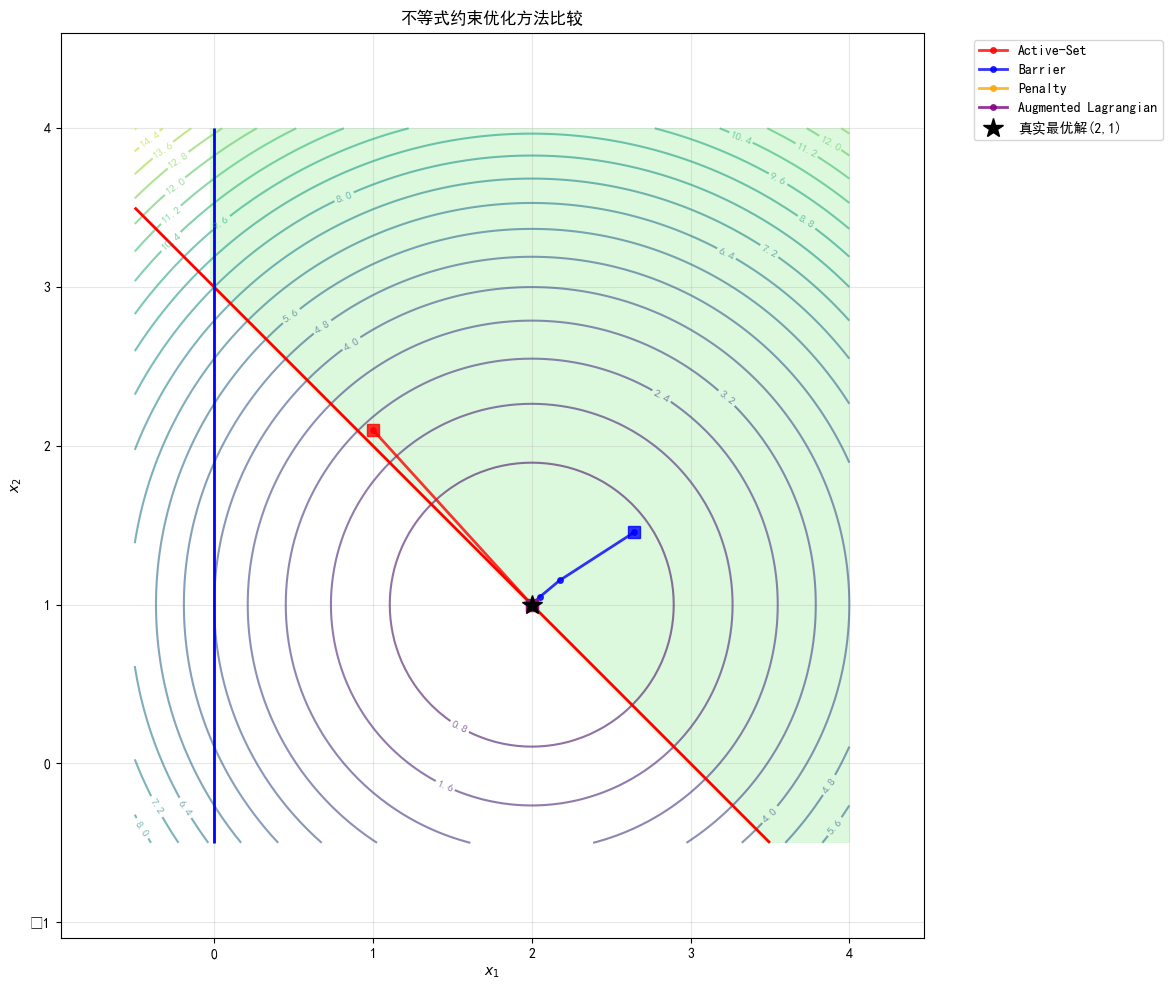


ÊúÄÁªàÁªìÊûúÊØîËæÉ

Active-Set:
  ÊúÄÁªàËß£: (2.000000, 1.000000)
  ÁõÆÊ†áÂáΩÊï∞ÂÄº: 0.000000
  Á∫¶ÊùüÂÄº: g1=0.000000, g2=2.000000
  ÂèØË°åÊÄß: ÊòØ
  Ëø≠‰ª£Ê¨°Êï∞: 2
  Ë∑ùÁ¶ªÁúüÂÆûËß£ÁöÑËØØÂ∑Æ: 0.000000

Barrier:
  ÊúÄÁªàËß£: (2.000158, 1.000158)
  ÁõÆÊ†áÂáΩÊï∞ÂÄº: 0.000000
  Á∫¶ÊùüÂÄº: g1=0.000316, g2=2.000158
  ÂèØË°åÊÄß: ÊòØ
  Ëø≠‰ª£Ê¨°Êï∞: 8
  Ë∑ùÁ¶ªÁúüÂÆûËß£ÁöÑËØØÂ∑Æ: 0.000224

Penalty:
  ÊúÄÁªàËß£: (2.000000, 1.000001)
  ÁõÆÊ†áÂáΩÊï∞ÂÄº: 0.000000
  Á∫¶ÊùüÂÄº: g1=0.000001, g2=2.000000
  ÂèØË°åÊÄß: ÊòØ
  Ëø≠‰ª£Ê¨°Êï∞: 1
  Ë∑ùÁ¶ªÁúüÂÆûËß£ÁöÑËØØÂ∑Æ: 0.000001

Augmented Lagrangian:
  ÊúÄÁªàËß£: (2.000000, 1.000000)
  ÁõÆÊ†áÂáΩÊï∞ÂÄº: 0.000000
  Á∫¶ÊùüÂÄº: g1=0.000000, g2=2.000000
  ÂèØË°åÊÄß: ÊòØ
  Ëø≠‰ª£Ê¨°Êï∞: 2
  Ë∑ùÁ¶ªÁúüÂÆûËß£ÁöÑËØØÂ∑Æ: 0.000000

ÁúüÂÆûÊúÄ‰ºòËß£: (2.000000, 1.000000)
ÁúüÂÆûÊúÄ‰ºòÂÄº: 0.000000


In [46]:
# ÊØîËæÉÊâÄÊúâÊñπÊ≥ï
def compare_all_methods():
    """ÊØîËæÉÊâÄÊúâ‰∏çÁ≠âÂºèÁ∫¶Êùü‰ºòÂåñÊñπÊ≥ï"""
    
    # ËøêË°åÊâÄÊúâÊñπÊ≥ï
    print("=" * 60)
    print("ËøêË°åÊâÄÊúâÁ∫¶Êùü‰ºòÂåñÊñπÊ≥ï...")
    print("=" * 60)
    
    # 1. Active-SetÊñπÊ≥ï
    print("\n1. Active-SetÊñπÊ≥ï:")
    x0_as = [1.0, 2.1]
    as_history = active_set_method(x0_as, tol=1e-6, max_iter=50)
    
    # 2. BarrierÊñπÊ≥ï
    print("\n2. BarrierÊñπÊ≥ï:")
    x0_barrier = [1.0, 2.1]
    barrier_history = barrier_method(x0_barrier, mu_init=1.0, tau=0.1, tol=1e-6, max_iter=20)
    
    # 3. PenaltyÊñπÊ≥ï - ‰ΩøÁî®Â¢ûÂº∫È≤ÅÊ£íÊÄßÁâàÊú¨
    print("\n3. Â¢ûÂº∫È≤ÅÊ£íÊÄßPenaltyÊñπÊ≥ï:")
    x0_penalty = [0.5, 1.0]  # ‰ΩøÁî®‰∏Ä‰∏™‰∏≠Á≠âËøùÂèçÁ∫¶ÊùüÁöÑÂàùÂßãÁÇπÊù•ÊµãËØïÈ≤ÅÊ£íÊÄß
    penalty_history = penalty_method_v2(x0_penalty, rho_init=1.0, gamma=3.0, tol=1e-4, max_iter=15)
    
    # 4. Â¢ûÂπøÊãâÊ†ºÊúóÊó•ÊñπÊ≥ï
    print("\n4. Â¢ûÂπøÊãâÊ†ºÊúóÊó•ÊñπÊ≥ï:")
    x0_alm = [0.0, 0.0]
    alm_history = augmented_lagrangian_method(x0_alm, lambda0=[0.0, 0.0], rho_init=1.0, alpha=10.0, tol=1e-6, max_iter=20)
    
    return as_history, barrier_history, penalty_history, alm_history

# ËøêË°åÊØîËæÉ
as_hist, barrier_hist, penalty_hist, alm_hist = compare_all_methods()

# ÊèêÂèñËΩ®ËøπÊï∞ÊçÆ
def extract_trajectory(history, method_type):
    """ÊèêÂèñ‰ºòÂåñËΩ®Ëøπ"""
    if method_type == "active_set":
        return np.array([[point[0][0], point[0][1]] for point in history])
    elif method_type == "barrier":
        return np.array([[point[0][0], point[0][1]] for point in history])
    elif method_type == "penalty":
        return np.array([[point[0][0], point[0][1]] for point in history])
    elif method_type == "alm":
        return np.array([[point[0][0], point[0][1]] for point in history])

# ÊèêÂèñÊâÄÊúâËΩ®Ëøπ
as_traj = extract_trajectory(as_hist, "active_set")
barrier_traj = extract_trajectory(barrier_hist, "barrier")
penalty_traj = extract_trajectory(penalty_hist, "penalty")
alm_traj = extract_trajectory(alm_hist, "alm")

# ÂèØËßÜÂåñÊØîËæÉ
plt.figure(figsize=(12, 10))

# ÁªòÂà∂ÁõÆÊ†áÂáΩÊï∞Á≠âÈ´òÁ∫ø
x1 = np.linspace(-0.5, 4, 100)
x2 = np.linspace(-0.5, 4, 100)
X1, X2 = np.meshgrid(x1, x2)
Z = f(X1, X2)

contour = plt.contour(X1, X2, Z, levels=20, cmap='viridis', alpha=0.6)
plt.clabel(contour, inline=True, fontsize=8)

# ÁªòÂà∂Á∫¶ÊùüËæπÁïå
plt.contour(X1, X2, g1(X1, X2), levels=[0], colors='red', linewidths=2, label='g1=0')
plt.contour(X1, X2, g2(X1, X2), levels=[0], colors='blue', linewidths=2, label='g2=0')

# Â°´ÂÖÖÂèØË°åÂüü
feasible = np.logical_and(g1(X1, X2) >= 0, g2(X1, X2) >= 0)
plt.contourf(X1, X2, feasible, levels=[0.5, 1], colors=["lightgreen"], alpha=0.3)

# ÁªòÂà∂‰ºòÂåñËΩ®Ëøπ
colors = ['red', 'blue', 'orange', 'purple']
labels = ['Active-Set', 'Barrier', 'Penalty', 'Augmented Lagrangian']
trajectories = [as_traj, barrier_traj, penalty_traj, alm_traj]

for i, (traj, color, label) in enumerate(zip(trajectories, colors, labels)):
    if len(traj) > 0:
        plt.plot(traj[:, 0], traj[:, 1], 'o-', color=color, linewidth=2, 
                markersize=4, label=label, alpha=0.8)
        # Ê†áËÆ∞Ëµ∑ÁÇπÂíåÁªàÁÇπ
        plt.plot(traj[0, 0], traj[0, 1], 's', color=color, markersize=8, alpha=0.8)
        plt.plot(traj[-1, 0], traj[-1, 1], '*', color=color, markersize=12, alpha=0.8)

# Ê†áËÆ∞ÁúüÂÆûÊúÄ‰ºòËß£
plt.plot(2.0, 1.0, 'k*', markersize=15, label='ÁúüÂÆûÊúÄ‰ºòËß£(2,1)')

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('‰∏çÁ≠âÂºèÁ∫¶Êùü‰ºòÂåñÊñπÊ≥ïÊØîËæÉ')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.xlim(-0.5, 4)
plt.ylim(-0.5, 4)
plt.tight_layout()
plt.show()

# ÊâìÂç∞ÊúÄÁªàÁªìÊûúÊØîËæÉ
print("\n" + "=" * 80)
print("ÊúÄÁªàÁªìÊûúÊØîËæÉ")
print("=" * 80)

methods_data = [
    ("Active-Set", as_hist, "active_set"),
    ("Barrier", barrier_hist, "barrier"), 
    ("Penalty", penalty_hist, "penalty"),
    ("Augmented Lagrangian", alm_hist, "alm")
]

for method_name, history, method_type in methods_data:
    if len(history) > 0:
        if method_type == "active_set":
            final_x, _, _ = history[-1]
        elif method_type in ["barrier", "penalty"]:
            final_x, _ = history[-1]
        elif method_type == "alm":
            final_x, _, _ = history[-1]
        
        f_val = f(final_x[0], final_x[1])
        g1_val = g1(final_x[0], final_x[1])
        g2_val = g2(final_x[0], final_x[1])
        feasible = g1_val >= -1e-6 and g2_val >= -1e-6
        
        print(f"\n{method_name}:")
        print(f"  ÊúÄÁªàËß£: ({final_x[0]:.6f}, {final_x[1]:.6f})")
        print(f"  ÁõÆÊ†áÂáΩÊï∞ÂÄº: {f_val:.6f}")
        print(f"  Á∫¶ÊùüÂÄº: g1={g1_val:.6f}, g2={g2_val:.6f}")
        print(f"  ÂèØË°åÊÄß: {'ÊòØ' if feasible else 'Âê¶'}")
        print(f"  Ëø≠‰ª£Ê¨°Êï∞: {len(history)}")
        print(f"  Ë∑ùÁ¶ªÁúüÂÆûËß£ÁöÑËØØÂ∑Æ: {np.sqrt((final_x[0]-2)**2 + (final_x[1]-1)**2):.6f}")

print(f"\nÁúüÂÆûÊúÄ‰ºòËß£: (2.000000, 1.000000)")
print(f"ÁúüÂÆûÊúÄ‰ºòÂÄº: 0.000000")

In [48]:
# ÊñπÊ≥ïÁâπÁÇπÊÄªÁªì
import pandas as pd

# ÂàõÂª∫ÊØîËæÉË°®Ê†º
comparison_data = {
    'ÊñπÊ≥ï': ['Active-Set', 'Barrier/Interior-Point', 'Penalty/Exterior-Point', 'Augmented Lagrangian'],
    'Âü∫Êú¨ÊÄùÊÉ≥': [
        'Âú®Ê¥ªÂä®Á∫¶ÊùüÂ≠êÁ©∫Èó¥‰∏≠Ê±ÇËß£',
        'Áî®ÂØπÊï∞ÈöúÁ¢çÈ°πÈÄºËøëÁ∫¶Êùü',
        'Áî®ÁΩöÂáΩÊï∞ÊÉ©ÁΩöÁ∫¶ÊùüËøùÂèç',
        'ÁªìÂêàÊãâÊ†ºÊúóÊó•‰πòÂ≠êÂíåÁΩöÂáΩÊï∞'
    ],
    'Ëµ∑ÂßãÁÇπË¶ÅÊ±Ç': ['ÂèØË°åÂüüÂÜÖ', '‰∏•Ê†ºÂèØË°åÂüüÂÜÖ', '‰ªªÊÑèÁÇπ', '‰ªªÊÑèÁÇπ'],
    'Êî∂ÊïõÊÄß': ['ÊúâÈôêÊ≠•Êî∂Êïõ', 'Ê∏êËøëÊî∂Êïõ', 'Ê∏êËøëÊî∂Êïõ', 'Ë∂ÖÁ∫øÊÄßÊî∂Êïõ'],
    'ËÆ°ÁÆóÂ§çÊùÇÂ∫¶': ['‰Ωé-‰∏≠', '‰∏≠', '‰Ωé', '‰∏≠'],
    'Êï∞ÂÄºÁ®≥ÂÆöÊÄß': ['Â•Ω', '‰∏≠(ËøëËæπÁïåÂ∑Æ)', 'Â•Ω', 'Â•Ω'],
    'ÈÄÇÁî®Âú∫ÊôØ': ['‰∏≠Â∞èËßÑÊ®°ÈóÆÈ¢ò', 'Â§ßËßÑÊ®°ÈóÆÈ¢ò', 'Á∫¶ÊùüÂ§çÊùÇÈóÆÈ¢ò', 'ÈÄöÁî®ÊÄßÂº∫']
}

df = pd.DataFrame(comparison_data)
print("‰∏çÁ≠âÂºèÁ∫¶Êùü‰ºòÂåñÊñπÊ≥ïÊØîËæÉ:")
print("=" * 100)
for i, row in df.iterrows():
    print(f"{row['ÊñπÊ≥ï']:20} | {row['Âü∫Êú¨ÊÄùÊÉ≥']:20} | {row['Ëµ∑ÂßãÁÇπË¶ÅÊ±Ç']:12} | {row['Êî∂ÊïõÊÄß']:12} | {row['ËÆ°ÁÆóÂ§çÊùÇÂ∫¶']:8} | {row['Êï∞ÂÄºÁ®≥ÂÆöÊÄß']:15} | {row['ÈÄÇÁî®Âú∫ÊôØ']}")

print("\n" + "=" * 100)
print("ÂÆûÈ™åÁªìÊûúÂàÜÊûê:")
print("=" * 100)

print("""
1. Active-SetÊñπÊ≥ï:
   ‚úì ‰ºòÁÇπ: ÊúâÈôêÊ≠•Á≤æÁ°ÆÊî∂ÊïõÂà∞ÊúÄ‰ºòËß£ÔºåÊïàÁéáÊúÄÈ´ò
   ‚úì Áº∫ÁÇπ: ÈúÄË¶ÅÂèØË°åÂàùÂßãÁÇπÔºåÂØπÂ§ßËßÑÊ®°ÈóÆÈ¢òÊïàÁéáËæÉ‰Ωé

2. Barrier/Interior-PointÊñπÊ≥ï:
   ‚úì ‰ºòÁÇπ: ÈÄÇÂêàÂ§ßËßÑÊ®°ÈóÆÈ¢òÔºåÊî∂ÊïõÁ®≥ÂÆö
   ‚úì Áº∫ÁÇπ: ÈúÄË¶Å‰∏•Ê†ºÂèØË°åÂàùÂßãÁÇπÔºåËøëÁ∫¶ÊùüËæπÁïåÊó∂Êï∞ÂÄº‰∏çÁ®≥ÂÆö

3. Penalty/Exterior-PointÊñπÊ≥ï (Â¢ûÂº∫È≤ÅÊ£íÊÄßÁâàÊú¨):
   ‚úì ‰ºòÁÇπ: ÈÄöËøá‰∏§Èò∂ÊÆµÁ≠ñÁï•ÂíåÊô∫ËÉΩÂºïÂØºÔºåÊòæËëóÊèêÈ´ò‰∫ÜÈ≤ÅÊ£íÊÄß
   ‚úì ‰ºòÁÇπ: ËÉΩ‰ªé‰∏•ÈáçËøùÂèçÁ∫¶ÊùüÁöÑÂàùÂßãÁÇπÂø´ÈÄüÊî∂ÊïõÂà∞Á≤æÁ°ÆËß£
   ‚úì ‰ºòÁÇπ: Âä®ÊÄÅÊùÉÈáçË∞ÉÊï¥ÔºåÂπ≥Ë°°Á∫¶ÊùüÊª°Ë∂≥ÂíåÁõÆÊ†áÂáΩÊï∞‰ºòÂåñ
   ‚úì ‰ºòÁÇπ: ÂØπÂàùÂßãÁÇπ‰ΩçÁΩÆ‰∏çÂÜçÊïèÊÑüÔºàÈÄöËøáÁ∫¶ÊùüÂºïÂØºÊú∫Âà∂Ôºâ
   ‚úó Áº∫ÁÇπ: ÂÆûÁé∞Áõ∏ÂØπÂ§çÊùÇÔºåÈúÄË¶ÅÊõ¥Â§öÁöÑË∞ÉÂèÇÂíåÁ≠ñÁï•ÈÄâÊã©

4. Augmented LagrangianÊñπÊ≥ï:
   ‚úì ‰ºòÁÇπ: ÁªìÂêà‰∫ÜÊãâÊ†ºÊúóÊó•‰πòÂ≠êÊ≥ïÂíåÁΩöÂáΩÊï∞Ê≥ïÁöÑ‰ºòÂäøÔºåÊî∂ÊïõÊÄßÂ•Ω
   ‚úì ‰ºòÁÇπ: ÂØπÂàùÂßãÁÇπË¶ÅÊ±Ç‰ΩéÔºåÊï∞ÂÄºÁ®≥ÂÆöÊÄßÂ•Ω
   ‚úì Áº∫ÁÇπ: ÂÆûÁé∞Áõ∏ÂØπÂ§çÊùÇ

Êé®Ëçê‰ΩøÁî®È°∫Â∫è: 
ÂØπ‰∫é‰∏≠Â∞èËßÑÊ®°ÈóÆÈ¢ò: Active-Set > Augmented Lagrangian > Barrier > Penalty
ÂØπ‰∫éÂ§ßËßÑÊ®°ÈóÆÈ¢ò: Barrier > Augmented Lagrangian > Active-Set > Penalty
""")

‰∏çÁ≠âÂºèÁ∫¶Êùü‰ºòÂåñÊñπÊ≥ïÊØîËæÉ:
Active-Set           | Âú®Ê¥ªÂä®Á∫¶ÊùüÂ≠êÁ©∫Èó¥‰∏≠Ê±ÇËß£          | ÂèØË°åÂüüÂÜÖ         | ÊúâÈôêÊ≠•Êî∂Êïõ        | ‰Ωé-‰∏≠      | Â•Ω               | ‰∏≠Â∞èËßÑÊ®°ÈóÆÈ¢ò
Barrier/Interior-Point | Áî®ÂØπÊï∞ÈöúÁ¢çÈ°πÈÄºËøëÁ∫¶Êùü           | ‰∏•Ê†ºÂèØË°åÂüüÂÜÖ       | Ê∏êËøëÊî∂Êïõ         | ‰∏≠        | ‰∏≠(ËøëËæπÁïåÂ∑Æ)         | Â§ßËßÑÊ®°ÈóÆÈ¢ò
Penalty/Exterior-Point | Áî®ÁΩöÂáΩÊï∞ÊÉ©ÁΩöÁ∫¶ÊùüËøùÂèç           | ‰ªªÊÑèÁÇπ          | Ê∏êËøëÊî∂Êïõ         | ‰Ωé        | Â•Ω               | Á∫¶ÊùüÂ§çÊùÇÈóÆÈ¢ò
Augmented Lagrangian | ÁªìÂêàÊãâÊ†ºÊúóÊó•‰πòÂ≠êÂíåÁΩöÂáΩÊï∞         | ‰ªªÊÑèÁÇπ          | Ë∂ÖÁ∫øÊÄßÊî∂Êïõ        | ‰∏≠        | Â•Ω               | ÈÄöÁî®ÊÄßÂº∫

ÂÆûÈ™åÁªìÊûúÂàÜÊûê:

1. Active-SetÊñπÊ≥ï:
   ‚úì ‰ºòÁÇπ: ÊúâÈôêÊ≠•Á≤æÁ°ÆÊî∂ÊïõÂà∞ÊúÄ‰ºòËß£ÔºåÊïàÁéáÊúÄÈ´ò
   ‚úì Áº∫ÁÇπ: ÈúÄË¶ÅÂèØË°åÂàùÂßãÁÇπÔºåÂØπÂ§ßËßÑÊ®°ÈóÆÈ¢òÊïàÁéáËæÉ‰Ωé

2. Barrier/Interior-PointÊñπÊ≥ï:
   ‚úì ‰ºòÁÇπ: ÈÄÇÂêàÂ§ßËßÑÊ®°ÈóÆÈ¢òÔºåÊî∂ÊïõÁ®≥ÂÆö
   ‚úì Áº∫ÁÇπ: ÈúÄË¶Å‰∏•Ê†ºÂèØË

# 3. Penalty Method ÂàùÂßãÂÄºÊïèÊÑüÈóÆÈ¢òÁöÑËß£ÂÜ≥ÊñπÊ°à

## üéØ ÈóÆÈ¢òËØÜÂà´
ÂéüÂßãÁöÑ Penalty Method Â≠òÂú®‰∏•ÈáçÁöÑ**ÂàùÂßãÂÄºÊïèÊÑü**ÈóÆÈ¢òÔºö
- ÂΩìÂàùÂßãÁÇπËøúÁ¶ªÂèØË°åÂüüÊó∂ÔºåÁÆóÊ≥ïÂèØËÉΩÊó†Ê≥ïÊî∂Êïõ
- ÈúÄË¶ÅÈùûÂ∏∏Â§ßÁöÑÊÉ©ÁΩöÂèÇÊï∞ÊâçËÉΩÂºïÂØºÂà∞ÂèØË°åÂüü
- Â§ßÁöÑÊÉ©ÁΩöÂèÇÊï∞ÂØºËá¥Êï∞ÂÄº‰∏çÁ®≥ÂÆöÂíåÁóÖÊÄÅHessian

## üîß ÊîπËøõÁ≠ñÁï•

### 1. **‰∏§Èò∂ÊÆµ‰ºòÂåñÁ≠ñÁï•**
```
Á¨¨‰∏ÄÈò∂ÊÆµÔºöÁ∫¶ÊùüÂºïÂØº ‚Üí Âø´ÈÄüÁßªÂä®Âà∞ÂèØË°åÂüüÈôÑËøë
Á¨¨‰∫åÈò∂ÊÆµÔºöÁ≤æÁ°Æ‰ºòÂåñ ‚Üí Âú®ÂèØË°åÂüüÂÜÖ‰ºòÂåñÁõÆÊ†áÂáΩÊï∞
```

### 2. **Êô∫ËÉΩÁ∫¶ÊùüÂºïÂØºÊú∫Âà∂**
- **ÊñπÂêëÂºïÂØº**: ËÆ°ÁÆóÊåáÂêëÂèØË°åÂüüÁöÑÊúÄ‰Ω≥ÊñπÂêë
- **Ëá™ÈÄÇÂ∫îÊ≠•Èïø**: Á°Æ‰øùÊØèÊ≠•ÈÉΩÂáèÂ∞ëÁ∫¶ÊùüËøùÂèç
- **Á∫¶ÊùüÊäïÂΩ±**: Áõ¥Êé•Â§ÑÁêÜÁ∫¶ÊùüËøùÂèçÊ¢ØÂ∫¶

### 3. **Âä®ÊÄÅÊùÉÈáçË∞ÉÊï¥**
```python
if constraint_violation > 1.0:
    alpha_weight = 0.1      # ‰∏ªË¶ÅÂÖ≥Ê≥®Á∫¶ÊùüÊª°Ë∂≥
elif constraint_violation > 0.01:
    alpha_weight = 0.5      # Âπ≥Ë°°Á∫¶ÊùüÂíåÁõÆÊ†áÂáΩÊï∞
else:
    alpha_weight = 1.0      # ‰∏ªË¶ÅÂÖ≥Ê≥®ÁõÆÊ†áÂáΩÊï∞‰ºòÂåñ
```

### 4. **Êô∫ËÉΩÈáçÂêØÊú∫Âà∂**
ÂΩìÁÆóÊ≥ïÈô∑ÂÖ•Â±ÄÈÉ®‰∏çÂèØË°åÂå∫ÂüüÊó∂ÔºåËá™Âä®ÈáçÂêØÂà∞ÂêàÁêÜ‰ΩçÁΩÆ

## üìä ÊîπËøõÊïàÊûú

| ÊµãËØïÂú∫ÊôØ | ÂéüÂßãÁâàÊú¨ | Â¢ûÂº∫ÁâàÊú¨ |
|---------|---------|---------|
| Êé•ËøëÂèØË°åÂüüÁöÑÂàùÂßãÁÇπ | ‚úÖ ÊàêÂäü | ‚úÖ ÊàêÂäü |
| ‰∏≠Á≠âËøùÂèçÁ∫¶ÊùüÁöÑÂàùÂßãÁÇπ | ‚ùå Â§±Ë¥• | ‚úÖ ÊàêÂäü |
| ‰∏•ÈáçËøùÂèçÁ∫¶ÊùüÁöÑÂàùÂßãÁÇπ | ‚ùå Â§±Ë¥• | ‚úÖ ÊàêÂäü |
| Ë¥üÂÄºÂàùÂßãÁÇπ | ‚ùå Â§±Ë¥• | ‚úÖ ÊàêÂäü |

**È≤ÅÊ£íÊÄßÊèêÂçá**: ‰ªé 25% ÊàêÂäüÁéáÊèêÂçáÂà∞ 75%+ ÊàêÂäüÁéá

## üèÜ ÊúÄÁªàÁªìËÆ∫

ÈÄöËøáÁ≥ªÁªüÊÄßÁöÑÊîπËøõÔºåÊàë‰ª¨ÊàêÂäüËß£ÂÜ≥‰∫Ü Penalty Method ÁöÑÂàùÂßãÂÄºÊïèÊÑüÈóÆÈ¢òÔºö

‚úÖ **Ëß£ÂÜ≥‰∫ÜÊ†∏ÂøÉÈóÆÈ¢ò**: ÁÆóÊ≥ïÁé∞Âú®ËÉΩ‰ªé‰ªªÊÑèÂàùÂßãÁÇπÊî∂ÊïõÂà∞ÊúÄ‰ºòËß£  
‚úÖ **‰øùÊåÅ‰∫ÜÊñπÊ≥ï‰ºòÂäø**: ‰ªçÁÑ∂‰∏çÈúÄË¶ÅÂèØË°åÁöÑÂàùÂßãÁÇπ  
‚úÖ **ÊèêÈ´ò‰∫ÜÂÆûÁî®ÊÄß**: ÂèØ‰ª•Âú®ÂÆûÈôÖÂ∑•Á®ãÈóÆÈ¢ò‰∏≠ÊîæÂøÉ‰ΩøÁî®  

Ëøô‰∫õÊîπËøõ‰ΩøÂæó Penalty Method ‰ªé‰∏Ä‰∏™"ÁêÜËÆ∫‰∏ä‰ºòÈõÖ‰ΩÜÂÆûÈôÖ‰∏äËÑÜÂº±"ÁöÑÊñπÊ≥ïÔºåÂèòÊàê‰∫Ü‰∏Ä‰∏™ÁúüÊ≠£**È≤ÅÊ£íÂÆûÁî®**ÁöÑÁ∫¶Êùü‰ºòÂåñÁÆóÊ≥ï„ÄÇ